<h3 align=center> Group 1: Lakshmi Pravallika Muttineni, Prabhukanth Potlapalli, Sanjay Nimmagadda, Sravani Chada <br>
IST 5520 Project Proposal <br>
11/28/2022 </h3> 

<h2> Introduction </h2>

<p> The Crime Prediction is one of the important topics in recent years that aims to help make the job easier for the police. We have chosen the complaint data, which is published by the New York police department (NYPD), to reflect every felony, misdemeanor, and violation crime that has taken place in New York City so far this year (2022). We decided to dig deeper into the data to see if there are any underlying patterns or relationships that could explain the reasons for the high crime rate in New York City. For this project, we plan to build a model that predicts the possible crime locations and the suspects based on the historic data. This model can be helpful in suggesting areas and schedules for patrolling.</p>

<h2> Data </h2>

<p> The dataset was provided by the NYPD. It is a breakdown of every criminal complaint report filed in NYC by the NYPD for the current calendar year. The data is manually extracted every quarter and reviewed by the Office of Management Analysis and Planning. Each record represents a criminal complaint in NYC and includes information about the type of crime, the location, and time of enforcement. The information related to victim and suspect demographics is also included. It has 257k records and 36 columns. </p>

### Read Data

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
import scipy as sp
from IPython.display import Image

In [2]:
#Import Dataset
df = pd.read_csv('NYPD_Complaint_Data_Current__Year_To_Date.csv')
df.head()

,CMPLNT_NUM,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,CRM_ATPT_CPTD_CD,HADEVELOPT,HOUSING_PSA,...,TRANSIT_DISTRICT,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,New Georeferenced Column
0,244685801,69,BROOKLYN,01/01/2015,00:00:00,NaN,(null),COMPLETED,(null),NaN,...,NaN,<18,BLACK,F,1010541,175595,40.648614,-73.905257,"(40.6486135510607, -73.9052572032302)",POINT (-73.9052572032302 40.6486135510607)
1,242250195,42,BRONX,03/17/2022,15:23:00,03/17/2022,15:28:00,ATTEMPTED,(null),NaN,...,NaN,UNKNOWN,UNKNOWN,D,1010419,242374,40.831899,-73.905435,"(40.831899, -73.905435)",POINT (-73.905435 40.831899)
2,242385774,123,STATEN ISLAND,03/20/2022,11:52:00,NaN,(null),COMPLETED,(null),NaN,...,NaN,45-64,WHITE,F,926029,138052,40.545405,-74.209485,"(40.545405, -74.209485)",POINT (-74.209485 40.545405)
3,242643555,121,STATEN ISLAND,03/24/2022,15:00:00,03/24/2022,22:00:00,COMPLETED,(null),NaN,...,NaN,18-24,BLACK,F,942822,166353,40.623188,-74.149238,"(40.6231883776008, -74.1492376947323)",POINT (-74.1492376947323 40.6231883776008)
4,242816732,42,BRONX,03/29/2022,15:24:00,03/29/2022,15:30:00,COMPLETED,(null),NaN,...,NaN,45-64,BLACK,M,1010131,240105,40.825670,-73.906484,"(40.82567, -73.906484)",POINT (-73.906484 40.82567)


In [3]:
df_copy=df.copy(deep=True)

## Variables Dictionary :
### Expand the cell below to view the variables dictionary.

> **CMPLNT_NUM** - Randomly generated persistent ID for each complaint
> 
> **ADDR_PCT_CD** - The precinct in which the incident occurred
> 
> **BORO** - The name of the borough in which the incident occurred
> 
> **CMPLNT_FR_DT** - Exact date of occurrence for the reported event (or starting date of occurrence, if CMPLNT_TO_DT exists)
> 
> **CMPLNT_FR_TM** - Exact time of occurrence for the reported event (or starting time of occurrence, if CMPLNT_TO_TM exists)
> 
> **CMPLNT_TO_DT** - Ending date of occurrence for the reported event, if exact time of occurrence is unknown
> 
> **CMPLNT_TO_TM** - Ending time of occurrence for the reported event, if exact time of occurrence is unknown
> 
> **CRM_ATPT_CPTD_CD** - Indicator of whether crime was successfully completed or attempted, but failed or was interrupted prematurely
> 
> **HADEVELOPT** - Name of NYCHA housing development of occurrence, if applicable
> 
> **HOUSING_PSA** - Development Level Code
> 
> **JURISDICTION_CODE** - Jurisdiction responsible for incident. Either internal, like Police(0), Transit(1), and Housing(2); or external(3), like Correction, Port Authority, etc.
> 
> **JURIS_DESC** - Description of the jurisdiction code
> 
> **KY_CD** - Three digit offense classification code
> 
> **LAW_CAT_CD** - Level of offense: felony, misdemeanor, violation
> 
> **LOC_OF_OCCUR_DESC** - Specific location of occurrence in or around the premises; inside, opposite of, front of, rear of
> 
> **OFNS_DESC** - Description of offense corresponding with key code
> 
> **PARKS_NM** - Name of NYC park, playground or greenspace of occurrence, if applicable (state parks are not included)
> 
> **PATROL_BORO** - The name of the patrol borough in which the incident occurred
> 
> **PD_CD** - Three digit internal classification code (more granular than Key Code)
> 
> **PD_DESC** - Description of internal classification corresponding with PD code (more granular than Offense Description)
> 
> **PREM_TYP_DESC** - Specific description of premises; grocery store, residence, street, etc.
> 
> **RPT_DT** - Date event was reported to police
> 
> **STATION_NAME** - Transit station name
> 
> **SUSP_AGE_GROUP** - Suspect’s Age Group
> 
> **SUSP_RACE** - Suspect’s Race Description
> 
> **SUSP_SEX** - Suspect’s Sex Description
> 
> **TRANSIT_DISTRICT** - Transit district in which the offense occurred.
> 
> **VIC_AGE_GROUP** - Victim’s Age Group
> 
> **VIC_RACE** - Victim’s Race Description
> 
> **VIC_SEX** - Victim’s Sex Description (D=Business/Organization, E=PSNY/People of the State of New York, F=Female, M=Male)
> 
> **X_COORD_CD** - X-coordinate for New York State Plane Coordinate System, Long Island Zone, NAD 83, units feet (FIPS 3104)
> 
> **Y_COORD_CD** - Y-coordinate for New York State Plane Coordinate System, Long Island Zone, NAD 83, units feet (FIPS 3104)
> 
> **Latitude** - Midblock Latitude coordinate for Global Coordinate System, WGS 1984, decimal degrees (EPSG 4326)
> 
> **Longitude** - Midblock Longitude coordinate for Global Coordinate System, WGS 1984, decimal degrees (EPSG 4326)

In [4]:
print("Observations: ", df.shape[0])

print("Variables: ", df.shape[1])

Observations:  256797
Variables:  36


The dataset contains over 6 million crime reports, with a total of 35 variables each.

After looking at the head of the dataset we were already able to notice some NaN values, therefore we need to examine the missing values further before continuing with the analysis. 

- The `isna()` function will show us the percentage of non-existent values for each variable.

In [5]:
df.replace('(null)',np.nan,inplace= True)


In [6]:
#See the percentege of missing values in each variable
(df.isna().sum()/df.shape[0]*100).sort_values(ascending=False)

HADEVELOPT                  99.682629
PARKS_NM                    99.446645
STATION_NAME                97.777233
TRANSIT_DISTRICT            97.777233
HOUSING_PSA                 93.385826
SUSP_RACE                   19.779047
SUSP_AGE_GROUP              19.779047
SUSP_SEX                    19.779047
LOC_OF_OCCUR_DESC           15.991620
CMPLNT_TO_DT                 7.544481
CMPLNT_TO_TM                 7.523063
BORO_NM                      0.171731
PD_DESC                      0.104752
PD_CD                        0.104752
PREM_TYP_DESC                0.041667
VIC_RACE                     0.028038
OFNS_DESC                    0.002336
PATROL_BORO                  0.001558
X_COORD_CD                   0.000000
VIC_AGE_GROUP                0.000000
Y_COORD_CD                   0.000000
Latitude                     0.000000
Longitude                    0.000000
Lat_Lon                      0.000000
VIC_SEX                      0.000000
CMPLNT_NUM                   0.000000
RPT_DT      

In [7]:
#dropping columns that are missing more than 90 percent of values
df.drop(['PARKS_NM','STATION_NAME','TRANSIT_DISTRICT','HADEVELOPT','HOUSING_PSA'],axis='columns', inplace=True)

Dropping'HOUSING_PSA','TRANSIT_DISTRICT','HADEVELOPT','PARKS_NM', 'STATION_NAME' Columns as more than 90% of their values are null. Dropping'Lat_Lon', 'New Georeferenced Column' as this information is already present in Latitude and Longitude columns


In [8]:
df.fillna(np.nan,inplace = True)


In [9]:
df.drop_duplicates(inplace = True)


### Data  Visualization

In [10]:
df["SUSP_RACE"] = df["SUSP_RACE"].astype("category")
df["SUSP_RACE"] = df["SUSP_RACE"].cat.remove_categories("UNKNOWN")

<AxesSubplot:ylabel='SUSP_RACE'>

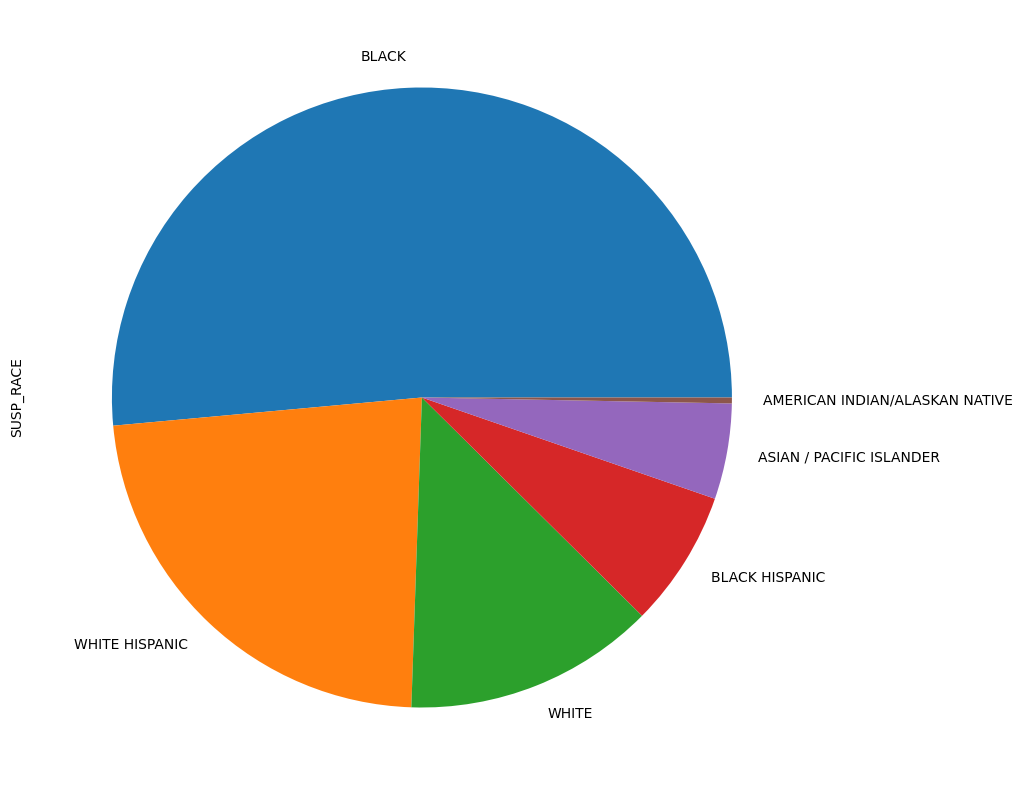

In [11]:
df['SUSP_RACE'].value_counts().plot(kind='pie',figsize=(10,15))

<AxesSubplot:>

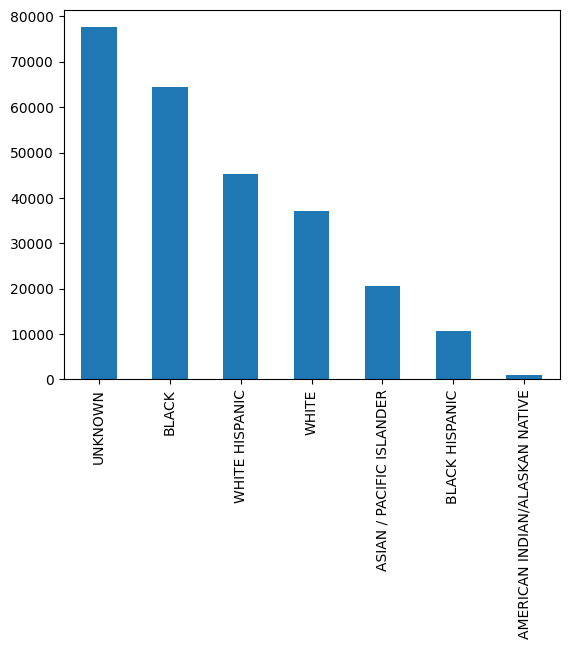

In [12]:
df['VIC_RACE'].value_counts().plot(kind='bar')

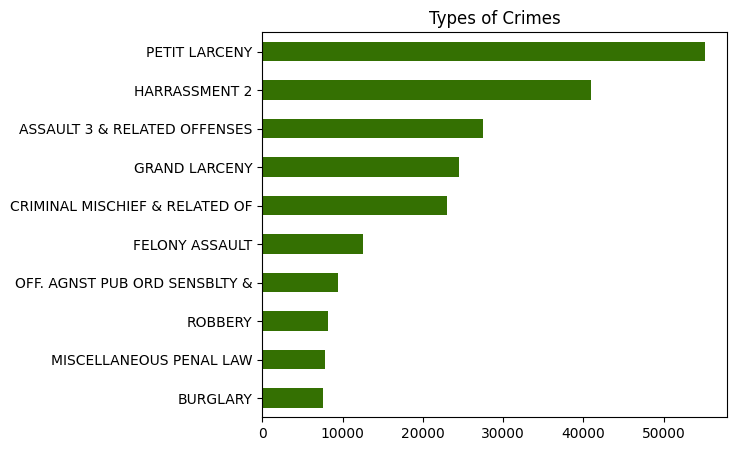

In [13]:
fig, ax = plt.subplots(figsize=(6, 5), dpi=100)
df_copy.OFNS_DESC.value_counts().iloc[:10].sort_values().plot(kind="barh", color = '#347002',title = "Types of Crimes",ax=ax)
plt.show()

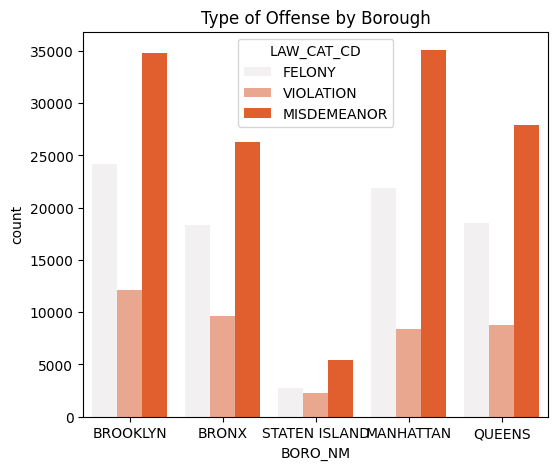

In [14]:
fig, ax = plt.subplots(figsize=(6, 5), dpi=100)
sns.countplot(x='BORO_NM', hue="LAW_CAT_CD", data=df,ax=ax,color='#ff5110')
plt.title('Type of Offense by Borough')
plt.show()

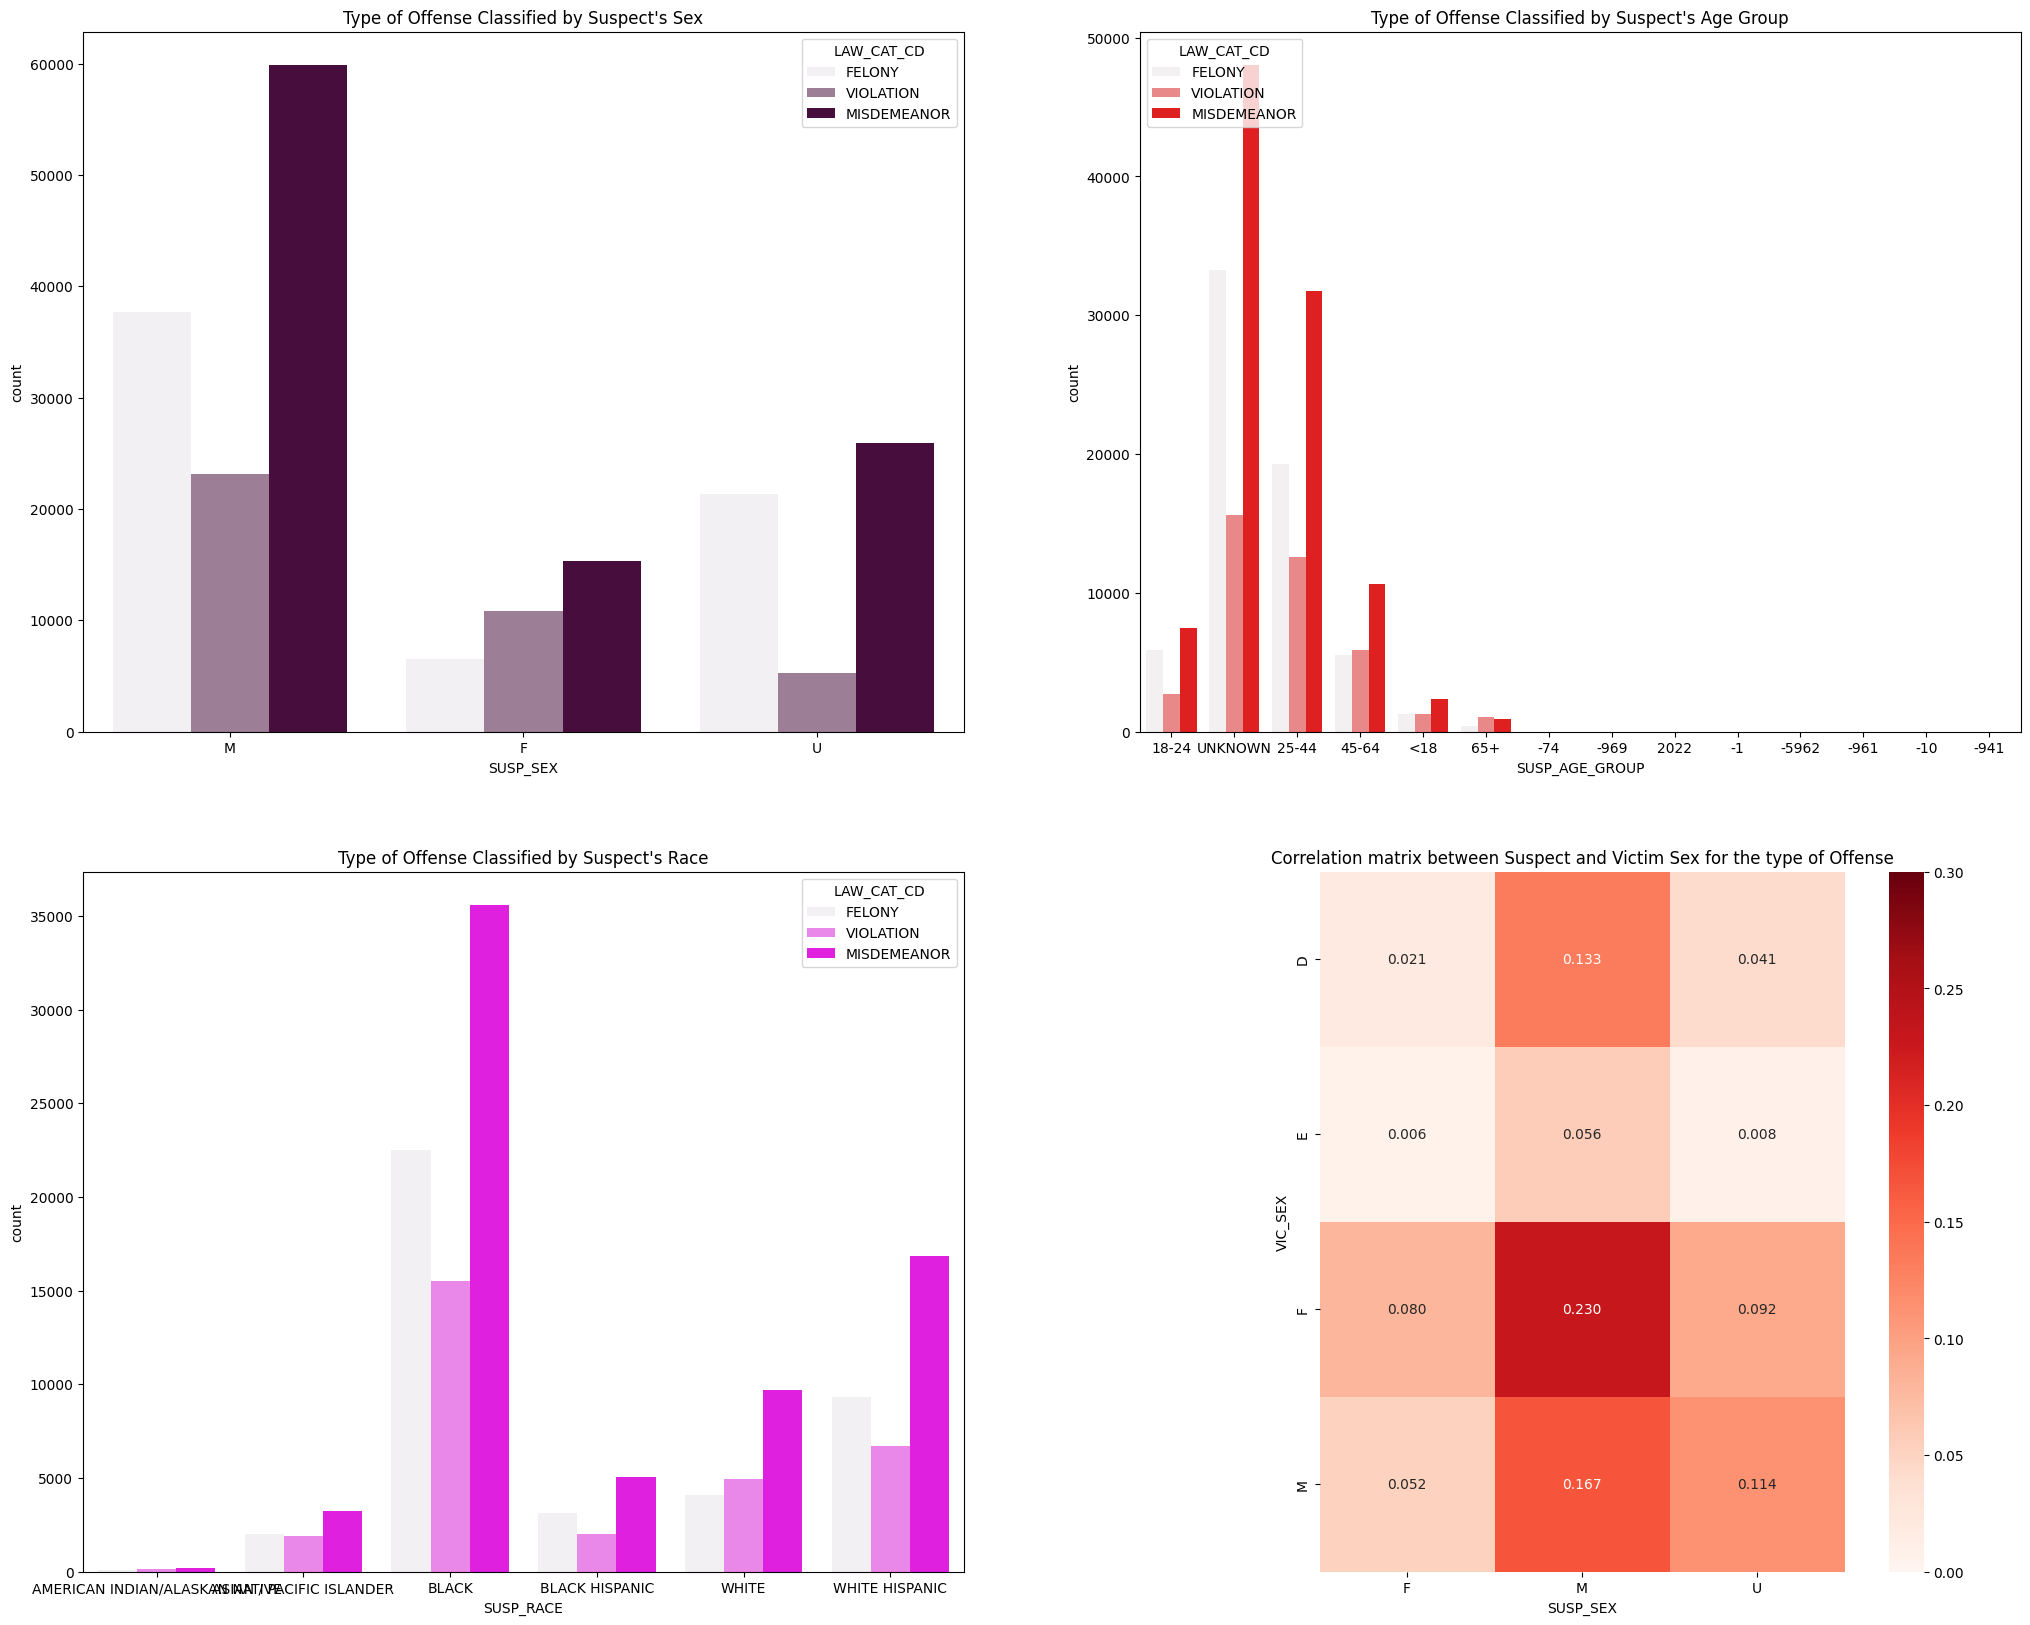

In [15]:
fig, ax= plt.subplots(2,2,figsize=(25,20))
sns.countplot(x='SUSP_SEX', hue="LAW_CAT_CD", data=df,ax=ax[0,0],color='#510343')
ax[0,0].set_title("Type of Offense Classified by Suspect's Sex")
sns.countplot(x='SUSP_AGE_GROUP', hue="LAW_CAT_CD", data=df,ax=ax[0,1],color='#ff0000')
ax[0,1].set_title("Type of Offense Classified by Suspect's Age Group")
sns.countplot(x='SUSP_RACE', hue="LAW_CAT_CD", data=df,ax=ax[1,0],color='#ff00ff')
ax[1,0].set_title("Type of Offense Classified by Suspect's Race")
cross_table = df.groupby(['SUSP_SEX', 'VIC_SEX'])['LAW_CAT_CD'].count()
cross_table = cross_table.divide(cross_table.sum(), axis=0).unstack(level=0)
sns.heatmap(cross_table, cmap="Reds",square=True,vmin=0, vmax=0.30,annot=True,fmt='.3f',ax=ax[1,1])
ax[1,1].set_title('Correlation matrix between Suspect and Victim Sex for the type of Offense')
plt.show()

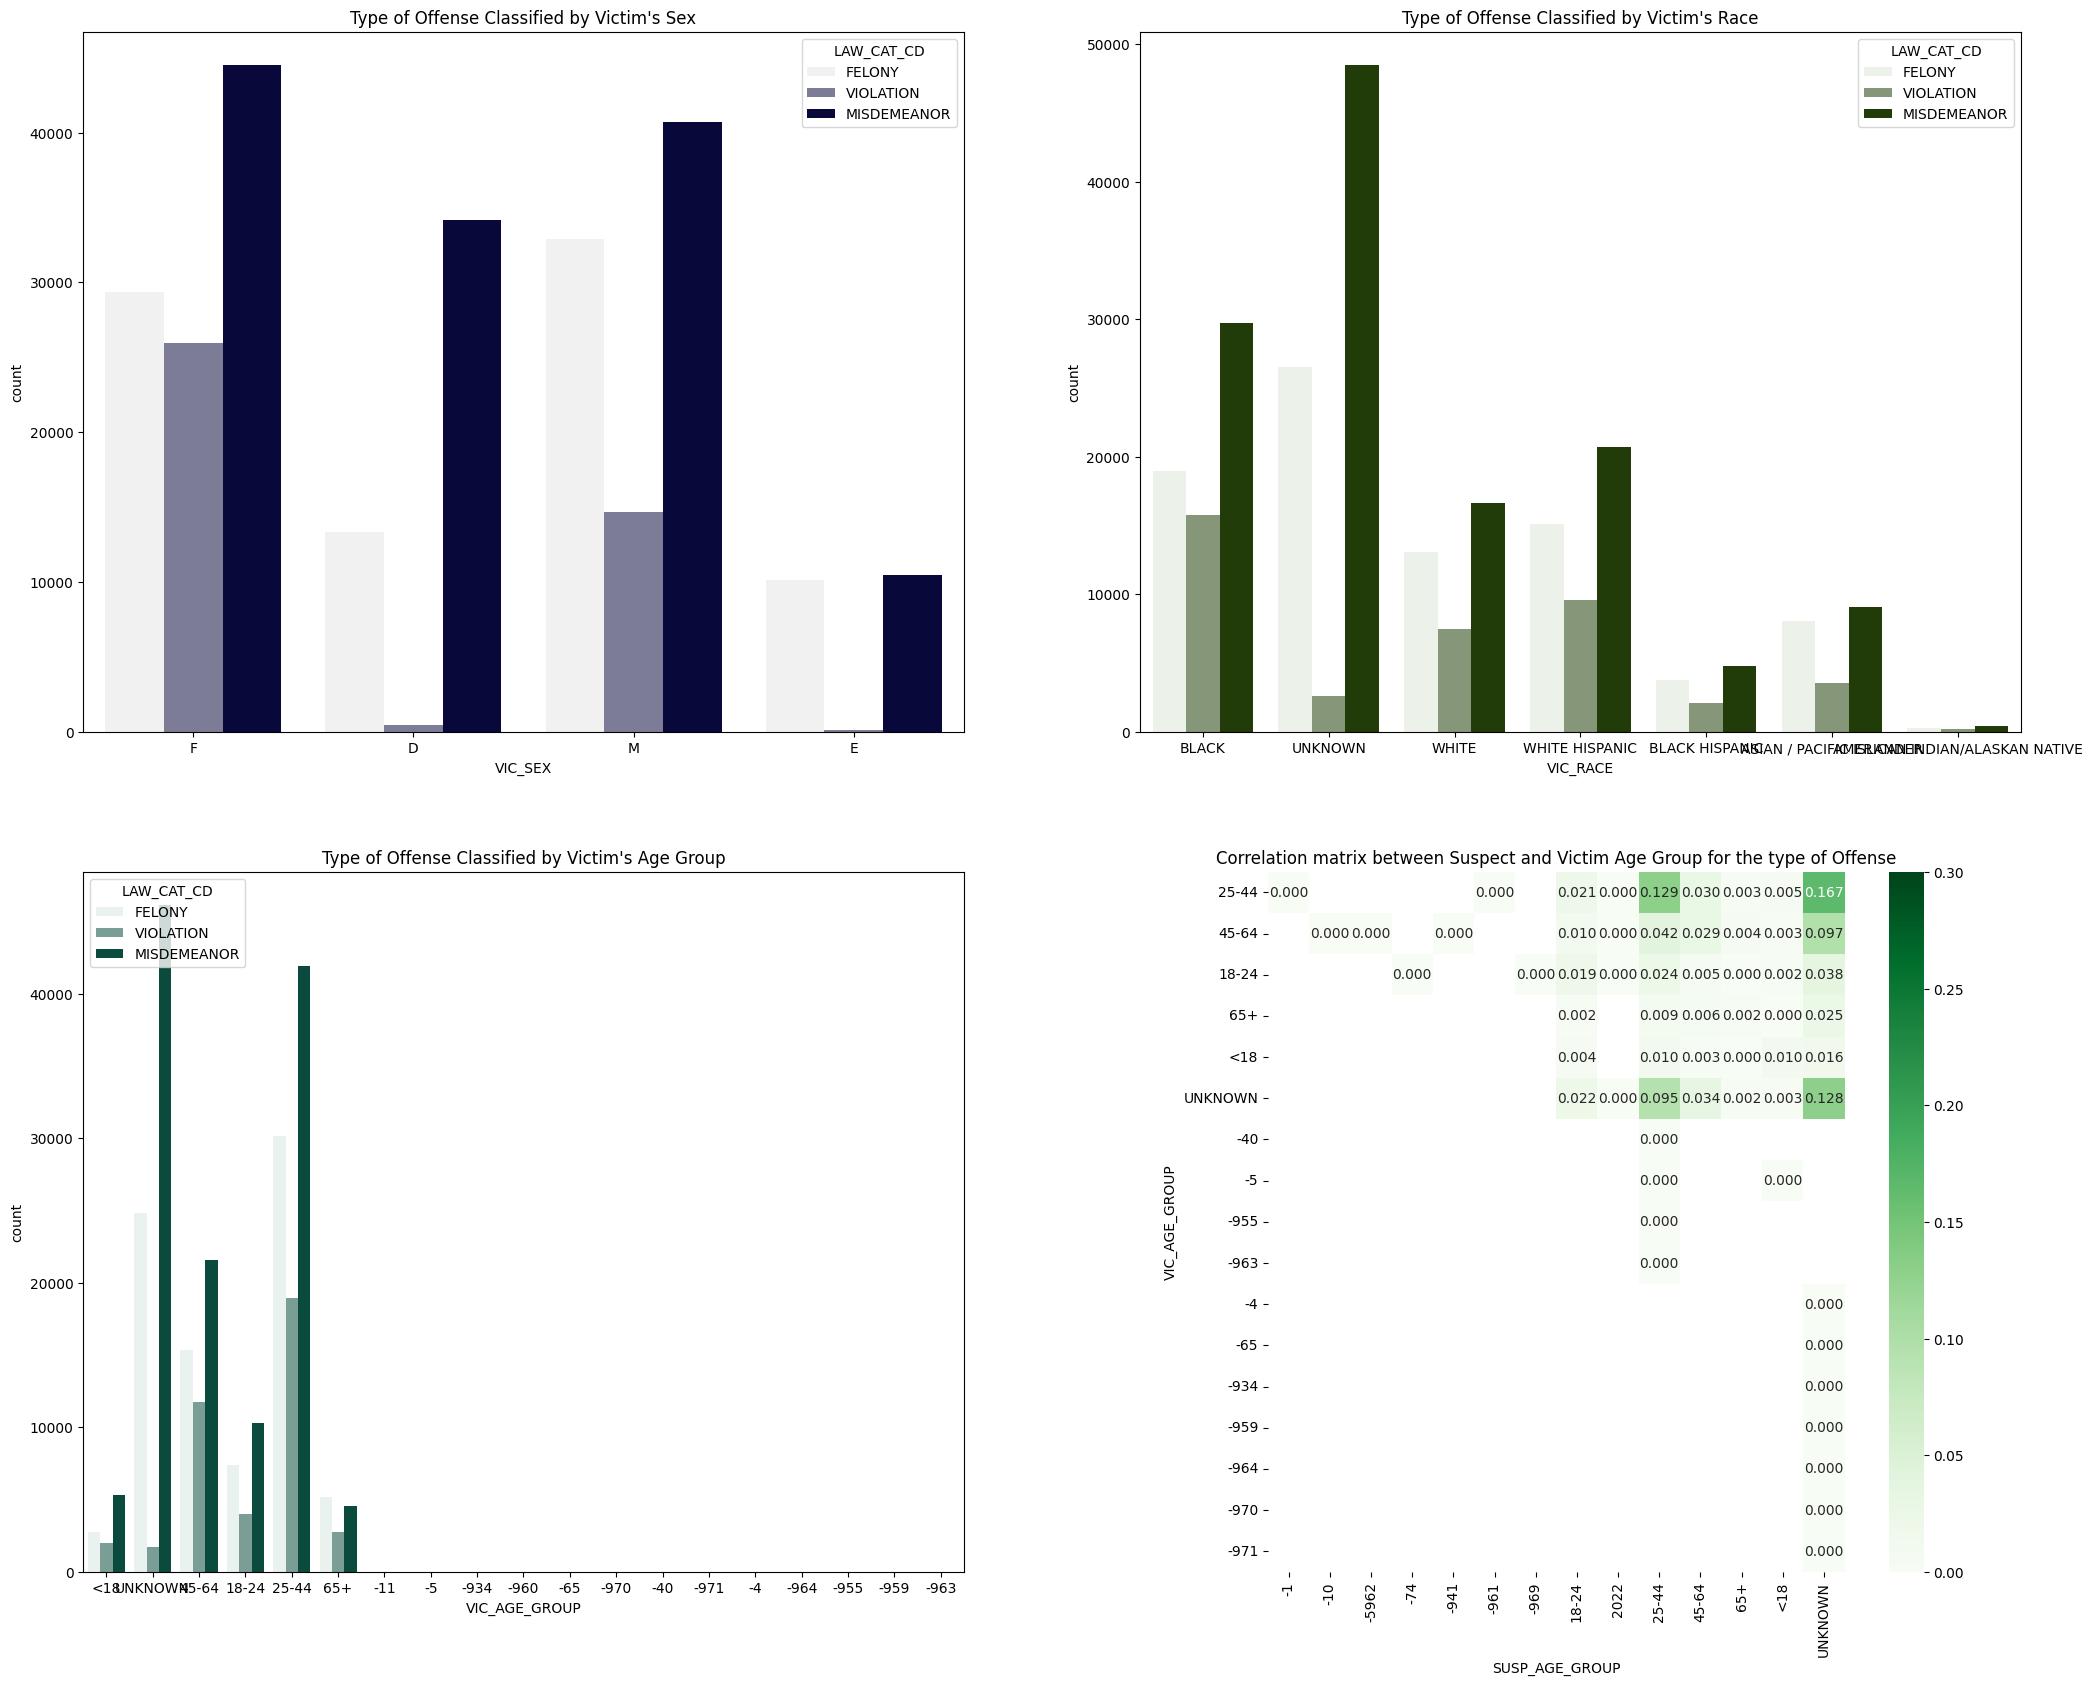

In [16]:
fig, ax= plt.subplots(2,2,figsize=(25,20))
sns.countplot(x='VIC_SEX', hue="LAW_CAT_CD", data=df,ax=ax[0,0],color='#000043')
ax[0,0].set_title("Type of Offense Classified by Victim's Sex")
sns.countplot(x='VIC_AGE_GROUP', hue="LAW_CAT_CD", data=df,ax=ax[1,0],color='#005643')
ax[1,0].set_title("Type of Offense Classified by Victim's Age Group")
sns.countplot(x='VIC_RACE', hue="LAW_CAT_CD", data=df,ax=ax[0,1],color='#214301')
ax[0,1].set_title("Type of Offense Classified by Victim's Race")
cross_table = df.groupby(['SUSP_AGE_GROUP', 'VIC_AGE_GROUP'])['LAW_CAT_CD'].count()
cross_table = cross_table.divide(cross_table.sum(), axis=0).unstack(level=0)
sns.heatmap(cross_table, cmap="Greens",square=True,vmin=0, vmax=0.30,annot=True,fmt='.3f',ax=ax[1,1])
ax[1,1].set_title('Correlation matrix between Suspect and Victim Age Group for the type of Offense')
plt.show()

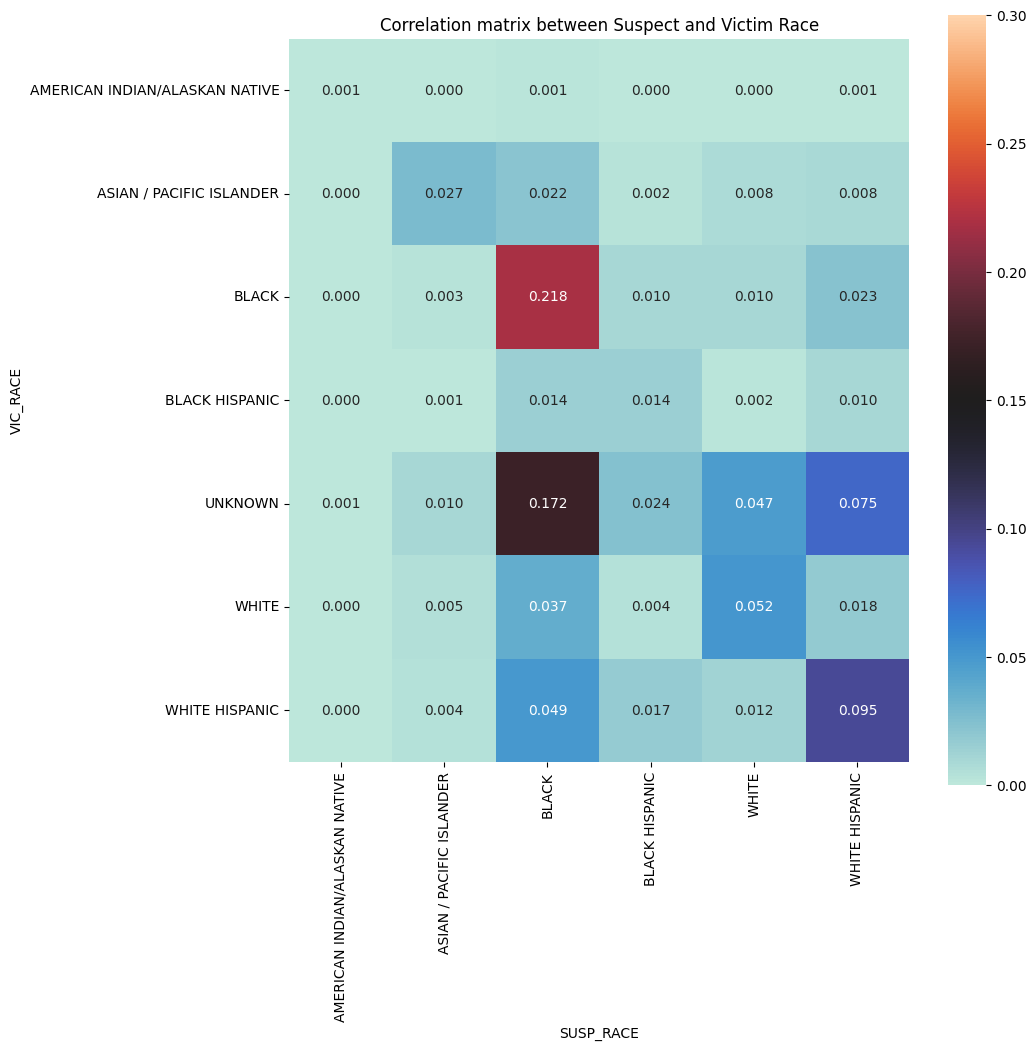

In [17]:
corr = df.groupby(['SUSP_RACE', 'VIC_RACE'])['OFNS_DESC'].count()
corr = corr.divide(corr.sum(), axis=0).unstack(level=0)
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.heatmap(corr, cmap="icefire", ax=ax,square=True,vmin=0, vmax=0.30,annot=True,fmt='.3f',)
plt.title('Correlation matrix between Suspect and Victim Race')
plt.show()

## Data Cleaning

#### Dealing with NaN data

Since some of the columns are pretty important for the analysis, I dropped entire rows which miss any crucial value. For that, I used the `dropNA()` function in Pandas.

It is worth mention that some specific variables have a lot of NaN values, and they don't necessarily have any use in this analysis (like PARKS_NM means the park or public place nearby where crime happened, and columns with information about the suspect are also not going to be important, considering they have a lot of missing data) so I would drop those columns entirely with the `drop()` function.

In [18]:

df.drop(['CMPLNT_NUM','X_COORD_CD','Y_COORD_CD','Lat_Lon', 'New Georeferenced Column'],axis='columns', inplace=True)

df.drop(['PREM_TYP_DESC', 'JURISDICTION_CODE'], axis='columns', inplace=True)

df.drop(['ADDR_PCT_CD','PD_CD','PD_DESC','JURIS_DESC'], axis='columns', inplace=True)



In [19]:

df['SUSP_AGE_GROUP'].value_counts()


UNKNOWN    96968
25-44      63650
45-64      21985
18-24      16092
<18         4914
65+         2378
2022          11
-74            1
-969           1
-1             1
-5962          1
-961           1
-10            1
-941           1
Name: SUSP_AGE_GROUP, dtype: int64

In [20]:
df= df[~df['SUSP_AGE_GROUP'].isin(['2022', '-74','-969','-1','-5962','-961','-10','-941','UNKNOWN'])]
df['SUSP_AGE_GROUP'].value_counts()
df.shape

(159811, 20)

In [21]:
df['SUSP_RACE'].value_counts()

BLACK                             51927
WHITE HISPANIC                    25117
WHITE                             13294
BLACK HISPANIC                     7921
ASIAN / PACIFIC ISLANDER           5757
AMERICAN INDIAN/ALASKAN NATIVE      333
Name: SUSP_RACE, dtype: int64

In [22]:
df['VIC_AGE_GROUP'].value_counts()


25-44      56730
UNKNOWN    46339
45-64      28767
18-24      13821
65+         7329
<18         6818
-5             2
-11            1
-960           1
-40            1
-955           1
-963           1
Name: VIC_AGE_GROUP, dtype: int64

In [23]:
df= df[~df['VIC_AGE_GROUP'].isin(['UNKNOWN','-65', '-5','-934','-40','-4','-964','-955','-959','-963','-11','-960','-970','-971'])]
df['VIC_AGE_GROUP'].value_counts()
df.shape

(113465, 20)

In [24]:
df['VIC_RACE'].value_counts()

BLACK                             41341
WHITE HISPANIC                    28466
WHITE                             21064
ASIAN / PACIFIC ISLANDER          11476
BLACK HISPANIC                     6513
UNKNOWN                            4039
AMERICAN INDIAN/ALASKAN NATIVE      494
Name: VIC_RACE, dtype: int64

In [25]:
#df['VIC_RACE'].replace('UNKNOWN','BLACK',inplace=True)
df= df[~df['VIC_RACE'].isin(['UNKNOWN'])]
df['VIC_RACE'].value_counts()
df.shape

(109426, 20)

In [26]:
df.dropna(inplace=True)
df.reset_index(drop= True, inplace=True)
df.shape

(57858, 20)

## Data manipulation

In [27]:
#Extracting the day from date given
df['CMPLNT_FR_DT'] = pd.to_datetime(df['CMPLNT_FR_DT'],errors='coerce',format = "%m/%d/%Y" )
df['CMPLNT_TO_DT'] = pd.to_datetime(df['CMPLNT_TO_DT'],errors='coerce',format = "%m/%d/%Y" )
FR_DY = df['CMPLNT_FR_DT'].dt.day_name()
TO_DY = df['CMPLNT_TO_DT'].dt.day_name()

In [28]:
#concatinating th day column
df = pd.concat([df,FR_DY],axis=1)
df.columns = [*df.columns[:-1], 'CMPLNT_FR_DAY']

In [29]:
#concatinating the dat column
df = pd.concat([df,TO_DY],axis=1)
df.columns = [*df.columns[:-1], 'CMPLNT_TO_DAY']

In [30]:
fr_hr = pd.to_datetime(df['CMPLNT_FR_TM'], format='%H:%M:%S').dt.hour 
to_hr = pd.to_datetime(df['CMPLNT_TO_TM'], format='%H:%M:%S').dt.hour

In [31]:
df = pd.concat([df,fr_hr],axis=1)
df.columns = [*df.columns[:-1], 'CMPLNT_FR_PART']

In [32]:
df = pd.concat([df,to_hr],axis=1)
df.columns = [*df.columns[:-1], 'CMPLNT_TO_PART']

In [33]:
#Defining function to get part the hours
def f(x=0):
    if (x > 4) and (x <= 8):
        return 'Early Morning'
    elif (x > 8) and (x <= 12 ):
        return 'Morning'
    elif (x > 12) and (x <= 16):
        return'Noon'
    elif (x > 16) and (x <= 20) :
        return 'Evening'
    elif (x > 20) and (x <= 24):
        return'Night'
    elif (x <= 4):
        return'Late Night'

In [34]:
df['CMPLNT_FR_PART'] = df['CMPLNT_FR_PART'].apply(lambda z: f(z))

In [35]:
df['CMPLNT_TO_PART'] = df['CMPLNT_TO_PART'].apply(lambda z: f(z))

In [36]:
df.drop(columns=['CMPLNT_FR_DT','CMPLNT_FR_TM','CMPLNT_TO_DT','CMPLNT_TO_TM'],inplace= True)

In [37]:
df.drop(columns=['Latitude','Longitude'],inplace= True)

In [38]:
df.shape

(57858, 18)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57858 entries, 0 to 57857
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   BORO_NM            57858 non-null  object  
 1   CRM_ATPT_CPTD_CD   57858 non-null  object  
 2   KY_CD              57858 non-null  int64   
 3   LAW_CAT_CD         57858 non-null  object  
 4   LOC_OF_OCCUR_DESC  57858 non-null  object  
 5   OFNS_DESC          57858 non-null  object  
 6   PATROL_BORO        57858 non-null  object  
 7   RPT_DT             57858 non-null  object  
 8   SUSP_AGE_GROUP     57858 non-null  object  
 9   SUSP_RACE          57858 non-null  category
 10  SUSP_SEX           57858 non-null  object  
 11  VIC_AGE_GROUP      57858 non-null  object  
 12  VIC_RACE           57858 non-null  object  
 13  VIC_SEX            57858 non-null  object  
 14  CMPLNT_FR_DAY      57858 non-null  object  
 15  CMPLNT_TO_DAY      57858 non-null  object  
 16  CMPL

In [40]:
df["BORO_NM"] = df["BORO_NM"].astype("category")

In [41]:
df["PATROL_BORO"] = df["PATROL_BORO"].astype("category")

In [42]:
df_clean = df.replace({'HARRASSMENT 2': 'HARASSMENT', 
                'ESCAPE 3': 'ESCAPE',
                'ASSAULT 3 & RELATED OFFENSES': 'ASSAULT & RELATED OFFENSES',
                'CRIMINAL MISCHIEF & RELATED OF': 'CRIMINAL MISCHIEF',
                'OFF. AGNST PUB ORD SENSBLTY &': 'OFFENSES AGAINST PUBLIC ORDER/ADMINISTRATION',
                'OTHER STATE LAWS (NON PENAL LA': 'OTHER STATE LAWS (NON PENAL LAW)',
                'ENDAN WELFARE INCOMP': 'ENDANGERING WELFARE OF INCOMPETENT',
                'AGRICULTURE & MRKTS LAW-UNCLASSIFIED': 'AGRICULTURE & MARKETS LAW',
                'DISRUPTION OF A RELIGIOUS SERV': 'DISRUPTION OF A RELIGIOUS SERVICE',
                'LOITERING/GAMBLING (CARDS, DIC': 'GAMBLING',
                'OFFENSES AGAINST MARRIAGE UNCL': 'OFFENSES AGAINST MARRIAGE',
                'HOMICIDE-NEGLIGENT,UNCLASSIFIE': 'HOMICIDE-NEGLIGENT',
                                      'E': 'UNKNOWN',
                                      'D': 'BUSINESS/ORGANIZATION',
                                      'F': 'FEMALE',
                                      'M': 'MALE'}).copy()

## Exploratory Data Analysis :

In [43]:
#types of crimes (top 10)
df_clean.OFNS_DESC.value_counts().iloc[:10]

HARASSMENT                                      17302
ASSAULT & RELATED OFFENSES                      13134
FELONY ASSAULT                                   5875
OFFENSES AGAINST PUBLIC ORDER/ADMINISTRATION     4020
MISCELLANEOUS PENAL LAW                          3838
CRIMINAL MISCHIEF                                3069
ROBBERY                                          1944
OFFENSES AGAINST PUBLIC ADMINI                   1694
PETIT LARCENY                                    1457
SEX CRIMES                                       1426
Name: OFNS_DESC, dtype: int64

### Types of crime

<AxesSubplot:title={'center':'Types of Crimes'}>

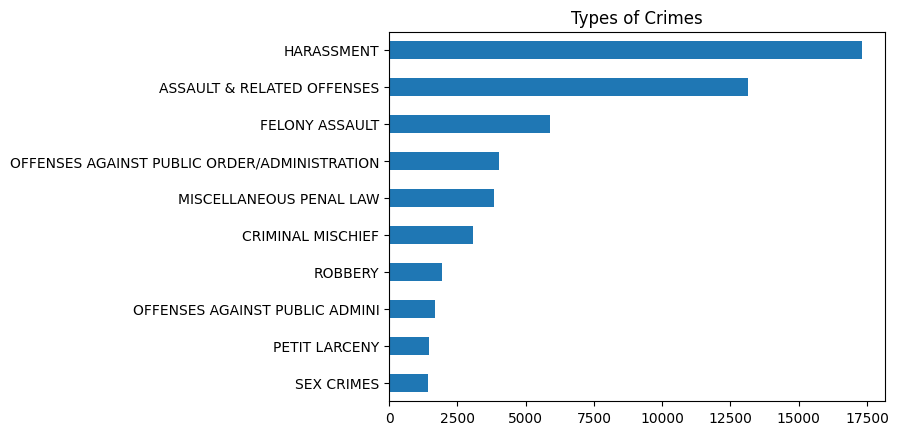

In [44]:
df_clean.OFNS_DESC.value_counts().iloc[:10].sort_values().plot(kind="barh", title = "Types of Crimes")

There are three levels of crime in New York State: Violation, Misdemeanor and Felony.

From the graph below, I can tell that Misdemeanor, an offense of which a sentence in excess of 15 days but not greater than one year may be imposed, is the most popular level of crime. The second popular one is Felony, the most serious of offenses, and the third one is Violation, a lesser offense for which a sentence only be no more than 15 days.

### Level of offence

array([<AxesSubplot:ylabel='LAW_CAT_CD'>], dtype=object)

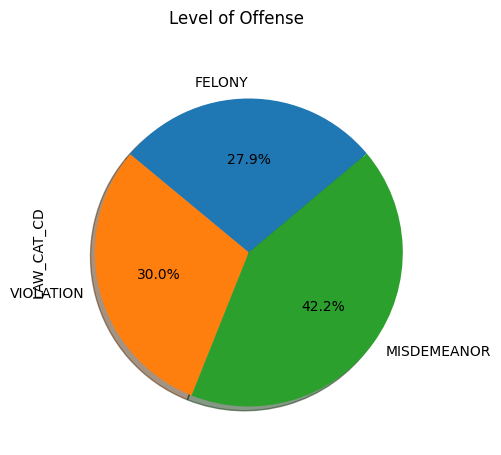

In [45]:
df_clean['LAW_CAT_CD'].value_counts().sort_values().plot(kind='pie', subplots=True, shadow = True,startangle=40,
figsize=(10,5), autopct='%1.1f%%', title = 'Level of Offense')

###  Distribution of crimes over the months and days

<AxesSubplot:title={'center':'Total Crime Events by Month'}, xlabel='month'>

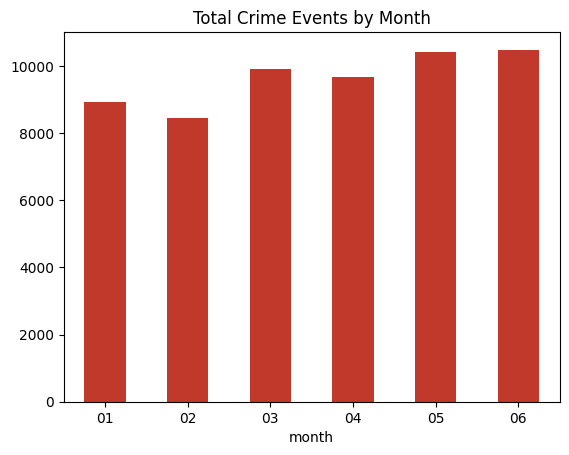

In [46]:
#reports by month
df_clean['month'] = df_clean['RPT_DT'].str.findall('(\d{2})').apply(lambda x: x[0])
df_clean.groupby('month').size().plot(kind = 'bar', title ='Total Crime Events by Month', color = '#C0392B',rot=0)

###  Analyzing a Specific Crime

I want to specifically analyze sex related crimes in NYC. For that, I put the part of the dataframe that contains the crime description 'sex crimes' and 'rape' into another dataframe and called it “sex_crimes.”

In [47]:
sex_crimes = df_clean[df.OFNS_DESC.str.contains('SEX CRIMES|RAPE')]
sex_crimes.head()

,BORO_NM,CRM_ATPT_CPTD_CD,KY_CD,LAW_CAT_CD,LOC_OF_OCCUR_DESC,OFNS_DESC,PATROL_BORO,RPT_DT,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,CMPLNT_FR_DAY,CMPLNT_TO_DAY,CMPLNT_FR_PART,CMPLNT_TO_PART,month
0,STATEN ISLAND,COMPLETED,104,FELONY,INSIDE,RAPE,PATROL BORO STATEN ISLAND,03/25/2022,25-44,BLACK,MALE,18-24,BLACK,FEMALE,Thursday,Thursday,Noon,Night,03
3,BRONX,COMPLETED,116,FELONY,INSIDE,SEX CRIMES,PATROL BORO BRONX,05/20/2022,25-44,WHITE HISPANIC,MALE,<18,WHITE HISPANIC,FEMALE,Tuesday,Saturday,Late Night,Late Night,05
9,MANHATTAN,COMPLETED,104,FELONY,INSIDE,RAPE,PATROL BORO MAN SOUTH,03/14/2022,25-44,ASIAN / PACIFIC ISLANDER,MALE,25-44,ASIAN / PACIFIC ISLANDER,FEMALE,Saturday,Saturday,Morning,Morning,03
10,BRONX,COMPLETED,104,FELONY,INSIDE,RAPE,PATROL BORO BRONX,02/19/2022,25-44,WHITE HISPANIC,FEMALE,<18,WHITE HISPANIC,FEMALE,Sunday,Sunday,Evening,Evening,02
11,QUEENS,COMPLETED,233,MISDEMEANOR,INSIDE,SEX CRIMES,PATROL BORO QUEENS SOUTH,03/07/2022,<18,ASIAN / PACIFIC ISLANDER,MALE,<18,BLACK,FEMALE,Wednesday,Friday,Noon,Noon,03


WHITE HISPANIC                    34.611172
BLACK                             33.515882
WHITE                             14.622125
ASIAN / PACIFIC ISLANDER          10.569551
BLACK HISPANIC                     6.243154
AMERICAN INDIAN/ALASKAN NATIVE     0.438116
Name: VIC_RACE, dtype: float64


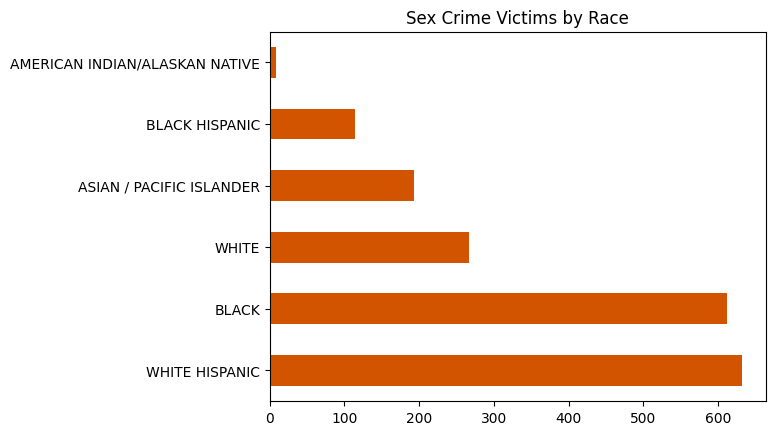

In [48]:
# Sex victims by Race :
sex_crimes['VIC_RACE'].value_counts().iloc[:7].plot(kind="barh", color = '#D35400', title = 'Sex Crime Victims by Race')

#victims by race percentage
vic_race_per = sex_crimes['VIC_RACE'].value_counts().iloc[:7] / sex_crimes['VIC_RACE'].shape[0] *100
print(vic_race_per)

In [49]:
df.KY_CD.nunique()

47

In [50]:
df.OFNS_DESC.nunique()

44

In [51]:
df.drop(columns=['KY_CD','OFNS_DESC','RPT_DT'],inplace= True)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57858 entries, 0 to 57857
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   BORO_NM            57858 non-null  category
 1   CRM_ATPT_CPTD_CD   57858 non-null  object  
 2   LAW_CAT_CD         57858 non-null  object  
 3   LOC_OF_OCCUR_DESC  57858 non-null  object  
 4   PATROL_BORO        57858 non-null  category
 5   SUSP_AGE_GROUP     57858 non-null  object  
 6   SUSP_RACE          57858 non-null  category
 7   SUSP_SEX           57858 non-null  object  
 8   VIC_AGE_GROUP      57858 non-null  object  
 9   VIC_RACE           57858 non-null  object  
 10  VIC_SEX            57858 non-null  object  
 11  CMPLNT_FR_DAY      57858 non-null  object  
 12  CMPLNT_TO_DAY      57858 non-null  object  
 13  CMPLNT_FR_PART     57858 non-null  object  
 14  CMPLNT_TO_PART     57858 non-null  object  
dtypes: category(3), object(12)
memory usage: 5.5+ MB


In [53]:
for col in ['CRM_ATPT_CPTD_CD','LAW_CAT_CD','LOC_OF_OCCUR_DESC','PATROL_BORO','SUSP_AGE_GROUP','SUSP_RACE','SUSP_SEX','VIC_AGE_GROUP','VIC_RACE','VIC_SEX','CMPLNT_FR_DAY','CMPLNT_TO_DAY','CMPLNT_FR_PART','CMPLNT_TO_PART']:
    df[col] = df[col].astype('category')

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57858 entries, 0 to 57857
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   BORO_NM            57858 non-null  category
 1   CRM_ATPT_CPTD_CD   57858 non-null  category
 2   LAW_CAT_CD         57858 non-null  category
 3   LOC_OF_OCCUR_DESC  57858 non-null  category
 4   PATROL_BORO        57858 non-null  category
 5   SUSP_AGE_GROUP     57858 non-null  category
 6   SUSP_RACE          57858 non-null  category
 7   SUSP_SEX           57858 non-null  category
 8   VIC_AGE_GROUP      57858 non-null  category
 9   VIC_RACE           57858 non-null  category
 10  VIC_SEX            57858 non-null  category
 11  CMPLNT_FR_DAY      57858 non-null  category
 12  CMPLNT_TO_DAY      57858 non-null  category
 13  CMPLNT_FR_PART     57858 non-null  category
 14  CMPLNT_TO_PART     57858 non-null  category
dtypes: category(15)
memory usage: 851.0 KB


In [55]:
df1= pd.get_dummies(df,columns=['CRM_ATPT_CPTD_CD','LAW_CAT_CD','LOC_OF_OCCUR_DESC','PATROL_BORO','SUSP_AGE_GROUP','SUSP_RACE','SUSP_SEX','VIC_AGE_GROUP','VIC_RACE','VIC_SEX','CMPLNT_FR_DAY','CMPLNT_TO_DAY','CMPLNT_FR_PART','CMPLNT_TO_PART'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57858 entries, 0 to 57857
Data columns (total 73 columns):
 #   Column                                    Non-Null Count  Dtype   
---  ------                                    --------------  -----   
 0   BORO_NM                                   57858 non-null  category
 1   CRM_ATPT_CPTD_CD_ATTEMPTED                57858 non-null  uint8   
 2   CRM_ATPT_CPTD_CD_COMPLETED                57858 non-null  uint8   
 3   LAW_CAT_CD_FELONY                         57858 non-null  uint8   
 4   LAW_CAT_CD_MISDEMEANOR                    57858 non-null  uint8   
 5   LAW_CAT_CD_VIOLATION                      57858 non-null  uint8   
 6   LOC_OF_OCCUR_DESC_FRONT OF                57858 non-null  uint8   
 7   LOC_OF_OCCUR_DESC_INSIDE                  57858 non-null  uint8   
 8   LOC_OF_OCCUR_DESC_OPPOSITE OF             57858 non-null  uint8   
 9   LOC_OF_OCCUR_DESC_REAR OF                 57858 non-null  uint8   
 10  PATROL_BORO_PATROL BOR

In [56]:
df1.BORO_NM.unique()

['STATEN ISLAND', 'MANHATTAN', 'QUEENS', 'BRONX', 'BROOKLYN']
Categories (5, object): ['BRONX', 'BROOKLYN', 'MANHATTAN', 'QUEENS', 'STATEN ISLAND']

In [57]:
df1= df1.replace({'BRONX': 1, 
                'BROOKLYN': 2,
                'MANHATTAN': 3,
                'QUEENS': 4,
                'STATEN ISLAND': 5
               }).copy()

In [58]:
# Show descriptive statistics
df1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CRM_ATPT_CPTD_CD_ATTEMPTED,57858.0,0.014103,0.117919,0.0,0.0,0.0,0.0,1.0
CRM_ATPT_CPTD_CD_COMPLETED,57858.0,0.985897,0.117919,0.0,1.0,1.0,1.0,1.0
LAW_CAT_CD_FELONY,57858.0,0.278769,0.448397,0.0,0.0,0.0,1.0,1.0
LAW_CAT_CD_MISDEMEANOR,57858.0,0.421653,0.493828,0.0,0.0,0.0,1.0,1.0
LAW_CAT_CD_VIOLATION,57858.0,0.299578,0.458077,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...
CMPLNT_TO_PART_Evening,57858.0,0.221905,0.415531,0.0,0.0,0.0,0.0,1.0
CMPLNT_TO_PART_Late Night,57858.0,0.146911,0.354021,0.0,0.0,0.0,0.0,1.0
CMPLNT_TO_PART_Morning,57858.0,0.178143,0.382636,0.0,0.0,0.0,0.0,1.0
CMPLNT_TO_PART_Night,57858.0,0.148882,0.355975,0.0,0.0,0.0,0.0,1.0


In [59]:
df1.corr(method='pearson')

,CRM_ATPT_CPTD_CD_ATTEMPTED,CRM_ATPT_CPTD_CD_COMPLETED,LAW_CAT_CD_FELONY,LAW_CAT_CD_MISDEMEANOR,LAW_CAT_CD_VIOLATION,LOC_OF_OCCUR_DESC_FRONT OF,LOC_OF_OCCUR_DESC_INSIDE,LOC_OF_OCCUR_DESC_OPPOSITE OF,LOC_OF_OCCUR_DESC_REAR OF,PATROL_BORO_PATROL BORO BKLYN NORTH,...,CMPLNT_FR_PART_Late Night,CMPLNT_FR_PART_Morning,CMPLNT_FR_PART_Night,CMPLNT_FR_PART_Noon,CMPLNT_TO_PART_Early Morning,CMPLNT_TO_PART_Evening,CMPLNT_TO_PART_Late Night,CMPLNT_TO_PART_Morning,CMPLNT_TO_PART_Night,CMPLNT_TO_PART_Noon
CRM_ATPT_CPTD_CD_ATTEMPTED,1.000000,-1.000000,0.140733,-0.060867,-0.072141,0.035514,-0.040182,0.015263,0.010273,0.001133,...,0.011823,-0.011482,0.004490,-0.001417,0.002360,-0.002143,0.012057,-0.009333,0.002682,-0.003603
CRM_ATPT_CPTD_CD_COMPLETED,-1.000000,1.000000,-0.140733,0.060867,0.072141,-0.035514,0.040182,-0.015263,-0.010273,-0.001133,...,-0.011823,0.011482,-0.004490,0.001417,-0.002360,0.002143,-0.012057,0.009333,-0.002682,0.003603
LAW_CAT_CD_FELONY,0.140733,-0.140733,1.000000,-0.530845,-0.406593,0.031360,-0.040669,0.027754,0.018541,0.011167,...,0.065622,-0.038161,0.010489,-0.019107,0.008836,-0.013368,0.052096,-0.031357,0.015667,-0.022417
LAW_CAT_CD_MISDEMEANOR,-0.060867,0.060867,-0.530845,1.000000,-0.558417,-0.009804,0.008497,0.003272,0.001606,-0.004701,...,0.011850,-0.011062,0.008854,-0.010746,-0.001400,0.001718,0.015912,-0.013078,0.006871,-0.008327
LAW_CAT_CD_VIOLATION,-0.072141,0.072141,-0.406593,-0.558417,1.000000,-0.020127,0.030650,-0.030695,-0.019881,-0.005863,...,-0.077011,0.049280,-0.019812,0.030288,-0.007140,0.011234,-0.068149,0.044793,-0.022743,0.030920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CMPLNT_TO_PART_Evening,-0.002143,0.002143,-0.013368,0.001718,0.011234,0.016282,-0.015047,-0.000240,-0.003237,-0.008309,...,-0.214519,-0.221179,-0.208176,-0.163757,-0.175129,1.000000,-0.221615,-0.248630,-0.223354,-0.272894
CMPLNT_TO_PART_Late Night,0.012057,-0.012057,0.052096,0.015912,-0.068149,-0.000111,-0.000276,0.000437,0.001241,-0.002015,...,0.852729,-0.187023,-0.076127,-0.203650,-0.136088,-0.221615,1.000000,-0.193204,-0.173563,-0.212059
CMPLNT_TO_PART_Morning,-0.009333,0.009333,-0.031357,-0.013078,0.044793,-0.027843,0.028652,-0.006487,-0.000791,0.003622,...,-0.170069,0.826518,-0.174303,-0.221522,-0.152678,-0.248630,-0.193204,1.000000,-0.194721,-0.237910
CMPLNT_TO_PART_Night,0.002682,-0.002682,0.015667,0.006871,-0.022743,-0.018058,0.020684,-0.003849,-0.009701,-0.001205,...,-0.141106,-0.180829,0.830897,-0.196793,-0.137156,-0.223354,-0.173563,-0.194721,1.000000,-0.213723


There are no numerical variables available to perform Data Normalization

## Correlation Heatmap

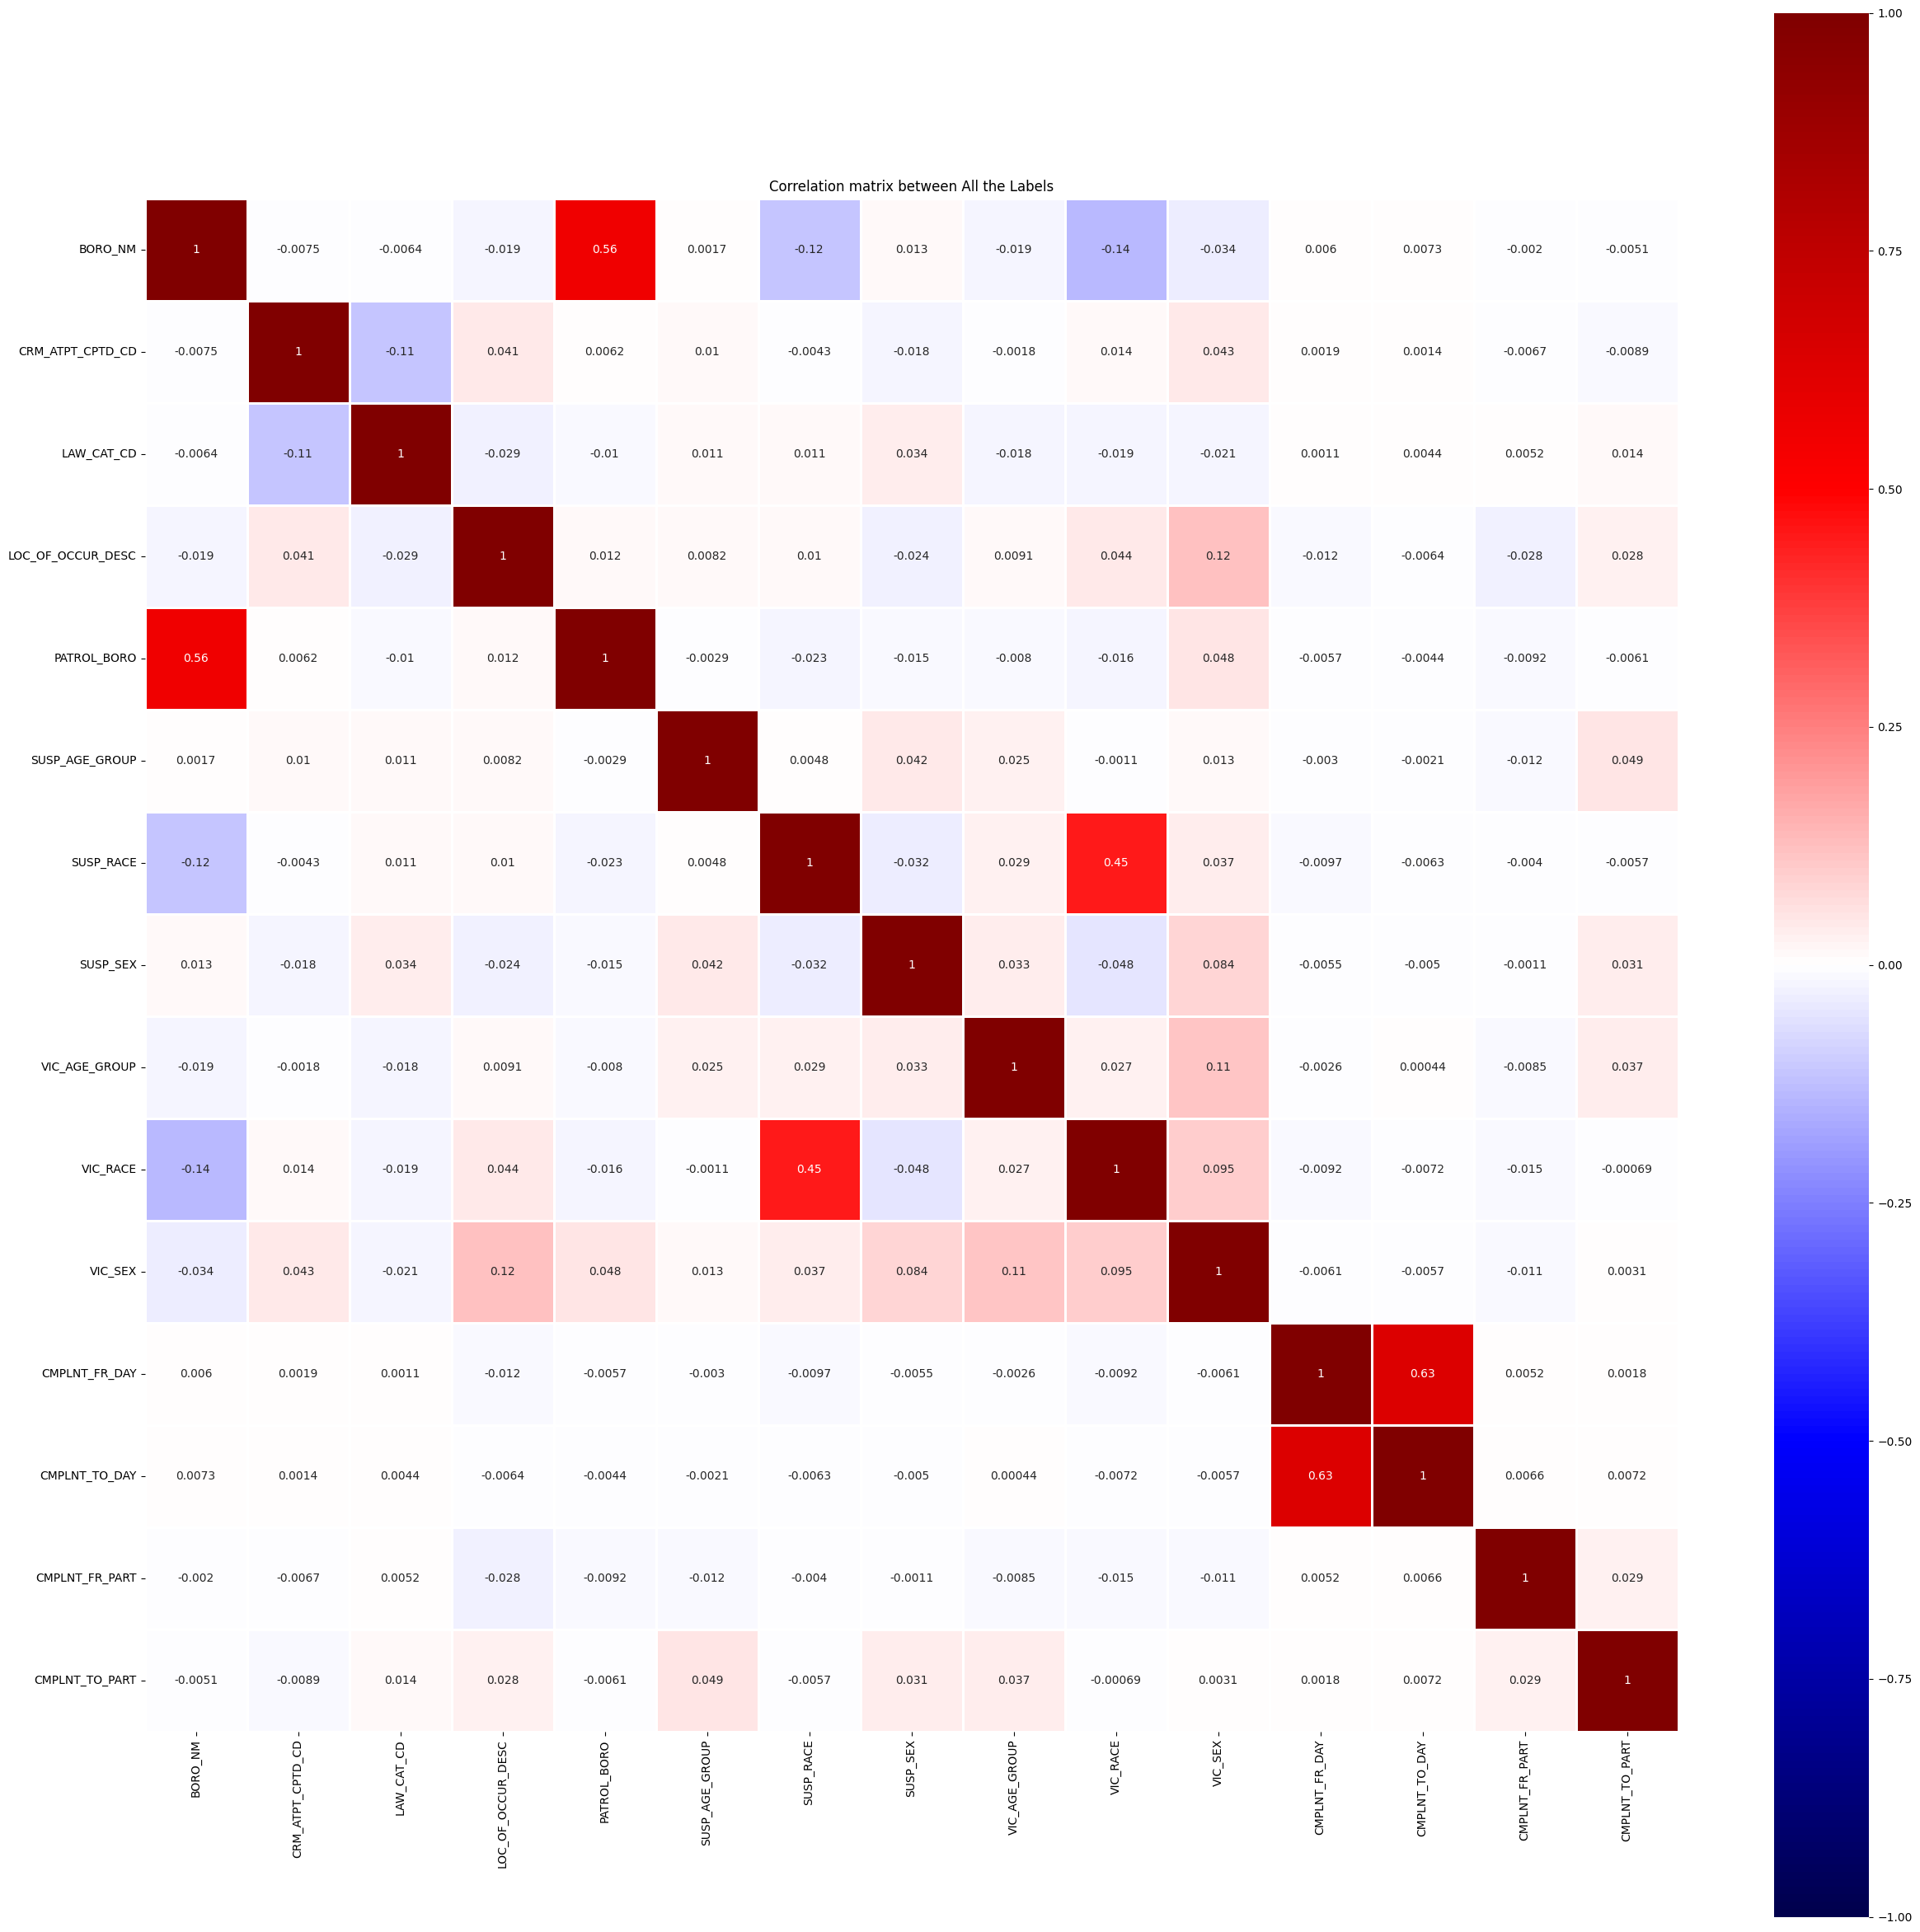

In [62]:
corr = df.apply(lambda x : pd.factorize(x)[0]).corr()
plt.figure(figsize = (30,30))
sns_plot = sns.heatmap(corr, cmap = "seismic", linewidth = 2, linecolor = "white", annot=True,vmin=-1, vmax=1, center=0, square=True)
plt.title('Correlation matrix between All the Labels')
plt.savefig("corr.png")

# PCA

In [63]:
 X= df1.drop("BORO_NM",1)
 

C:\Users\ACER\AppData\Local\Temp\ipykernel_16804\2622877443.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X= df1.drop("BORO_NM",1)


In [64]:
Y= df1['BORO_NM']

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=123)


In [66]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_scale = sc.fit_transform(X_train)
X_train_scale = pd.DataFrame(X_train_scale)
X_train_scale.columns = X_train.columns
X_test_scale = sc.transform(X_test)


In [67]:
pd.DataFrame(X_train).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CRM_ATPT_CPTD_CD_ATTEMPTED,46286.0,0.013676,0.116143,0.0,0.0,0.0,0.0,1.0
CRM_ATPT_CPTD_CD_COMPLETED,46286.0,0.986324,0.116143,0.0,1.0,1.0,1.0,1.0
LAW_CAT_CD_FELONY,46286.0,0.279285,0.448653,0.0,0.0,0.0,1.0,1.0
LAW_CAT_CD_MISDEMEANOR,46286.0,0.421164,0.493751,0.0,0.0,0.0,1.0,1.0
LAW_CAT_CD_VIOLATION,46286.0,0.299551,0.458066,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...
CMPLNT_TO_PART_Evening,46286.0,0.222378,0.415848,0.0,0.0,0.0,0.0,1.0
CMPLNT_TO_PART_Late Night,46286.0,0.145595,0.352703,0.0,0.0,0.0,0.0,1.0
CMPLNT_TO_PART_Morning,46286.0,0.178888,0.383262,0.0,0.0,0.0,0.0,1.0
CMPLNT_TO_PART_Night,46286.0,0.147237,0.354346,0.0,0.0,0.0,0.0,1.0


In [68]:
pd.DataFrame(X_train).corr()

,CRM_ATPT_CPTD_CD_ATTEMPTED,CRM_ATPT_CPTD_CD_COMPLETED,LAW_CAT_CD_FELONY,LAW_CAT_CD_MISDEMEANOR,LAW_CAT_CD_VIOLATION,LOC_OF_OCCUR_DESC_FRONT OF,LOC_OF_OCCUR_DESC_INSIDE,LOC_OF_OCCUR_DESC_OPPOSITE OF,LOC_OF_OCCUR_DESC_REAR OF,PATROL_BORO_PATROL BORO BKLYN NORTH,...,CMPLNT_FR_PART_Late Night,CMPLNT_FR_PART_Morning,CMPLNT_FR_PART_Night,CMPLNT_FR_PART_Noon,CMPLNT_TO_PART_Early Morning,CMPLNT_TO_PART_Evening,CMPLNT_TO_PART_Late Night,CMPLNT_TO_PART_Morning,CMPLNT_TO_PART_Night,CMPLNT_TO_PART_Noon
CRM_ATPT_CPTD_CD_ATTEMPTED,1.000000,-1.000000,0.138988,-0.060129,-0.071319,0.040312,-0.044428,0.012007,0.011304,-0.000993,...,0.011929,-0.011913,0.003345,-0.004213,0.003966,0.000105,0.011518,-0.008851,0.002519,-0.006850
CRM_ATPT_CPTD_CD_COMPLETED,-1.000000,1.000000,-0.138988,0.060129,0.071319,-0.040312,0.044428,-0.012007,-0.011304,0.000993,...,-0.011929,0.011913,-0.003345,0.004213,-0.003966,-0.000105,-0.011518,0.008851,-0.002519,0.006850
LAW_CAT_CD_FELONY,0.138988,-0.138988,1.000000,-0.530995,-0.407089,0.030084,-0.039836,0.030005,0.018292,0.009771,...,0.065252,-0.036022,0.008815,-0.020847,0.011923,-0.012238,0.050367,-0.028959,0.012050,-0.023096
LAW_CAT_CD_MISDEMEANOR,-0.060129,0.060129,-0.530995,1.000000,-0.557821,-0.007350,0.006224,0.001641,0.002532,-0.006202,...,0.008285,-0.012454,0.012350,-0.010201,-0.001985,0.001153,0.012999,-0.014299,0.011703,-0.007736
LAW_CAT_CD_VIOLATION,-0.071319,0.071319,-0.407089,-0.557821,1.000000,-0.021544,0.032309,-0.031157,-0.020645,-0.002885,...,-0.072841,0.048707,-0.021946,0.031414,-0.009539,0.010744,-0.063343,0.043777,-0.024417,0.030960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CMPLNT_TO_PART_Evening,0.000105,-0.000105,-0.012238,0.001153,0.010744,0.013139,-0.012188,0.001567,-0.003971,-0.005991,...,-0.213496,-0.223771,-0.206913,-0.164337,-0.175706,1.000000,-0.220751,-0.249604,-0.222206,-0.274437
CMPLNT_TO_PART_Late Night,0.011518,-0.011518,0.050367,0.012999,-0.063343,0.001612,-0.001837,-0.000123,0.001238,-0.004336,...,0.853409,-0.186461,-0.073300,-0.204558,-0.135633,-0.220751,1.000000,-0.192677,-0.171528,-0.211847
CMPLNT_TO_PART_Morning,-0.008851,0.008851,-0.028959,-0.014299,0.043777,-0.030385,0.030143,-0.009257,0.005831,0.002347,...,-0.169895,0.828149,-0.173427,-0.223516,-0.153361,-0.249604,-0.192677,1.000000,-0.193947,-0.239536
CMPLNT_TO_PART_Night,0.002519,-0.002519,0.012050,0.011703,-0.024417,-0.016918,0.019779,-0.001220,-0.012897,-0.002707,...,-0.140914,-0.180258,0.830192,-0.195860,-0.136527,-0.222206,-0.171528,-0.193947,1.000000,-0.213243


Normalization does not change the correlation between variables.

 run the component analysis with 76 components

In [69]:
from sklearn.decomposition import PCA

pca = PCA(n_components=72)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [70]:
explained_variance = pca.explained_variance_ratio_
explained_variance


array([6.46503435e-02, 5.70100975e-02, 4.98209564e-02, 4.52746344e-02,
       4.42010544e-02, 4.18541167e-02, 4.11629736e-02, 3.70581883e-02,
       3.53395556e-02, 3.34563689e-02, 3.25720417e-02, 3.20006088e-02,
       3.11171289e-02, 3.06801687e-02, 3.03896971e-02, 3.02232416e-02,
       3.01992761e-02, 2.97012709e-02, 2.87177427e-02, 2.30432684e-02,
       2.20031260e-02, 2.12038721e-02, 1.85258190e-02, 1.69176911e-02,
       1.56648478e-02, 1.45658059e-02, 1.42816500e-02, 1.28412196e-02,
       1.19890199e-02, 1.08207210e-02, 1.06301272e-02, 9.05357529e-03,
       8.78900337e-03, 7.10805054e-03, 6.11982842e-03, 5.63358165e-03,
       5.33203327e-03, 4.45543260e-03, 3.84809575e-03, 3.59931427e-03,
       3.29943360e-03, 3.13123873e-03, 3.03920942e-03, 2.97659831e-03,
       2.11009118e-03, 1.96101148e-03, 1.82584013e-03, 1.60837535e-03,
       1.59171334e-03, 1.33717453e-03, 1.28740882e-03, 1.02842334e-03,
       9.76125711e-04, 9.03157504e-04, 6.84352194e-04, 3.58598721e-04,
      

In [71]:
#Cumulative Variance explains
var1 = np.cumsum(np.round(explained_variance, decimals=4)*100)

print(var1)

[  6.47  12.17  17.15  21.68  26.1   30.29  34.41  38.12  41.65  45.
  48.26  51.46  54.57  57.64  60.68  63.7   66.72  69.69  72.56  74.86
  77.06  79.18  81.03  82.72  84.29  85.75  87.18  88.46  89.66  90.74
  91.8   92.71  93.59  94.3   94.91  95.47  96.    96.45  96.83  97.19
  97.52  97.83  98.13  98.43  98.64  98.84  99.02  99.18  99.34  99.47
  99.6   99.7   99.8   99.89  99.96 100.   100.   100.   100.   100.
 100.   100.   100.   100.   100.   100.   100.   100.   100.   100.
 100.   100.  ]


Draw a scree plot to show the cumulative variance explained along the number of principal components.

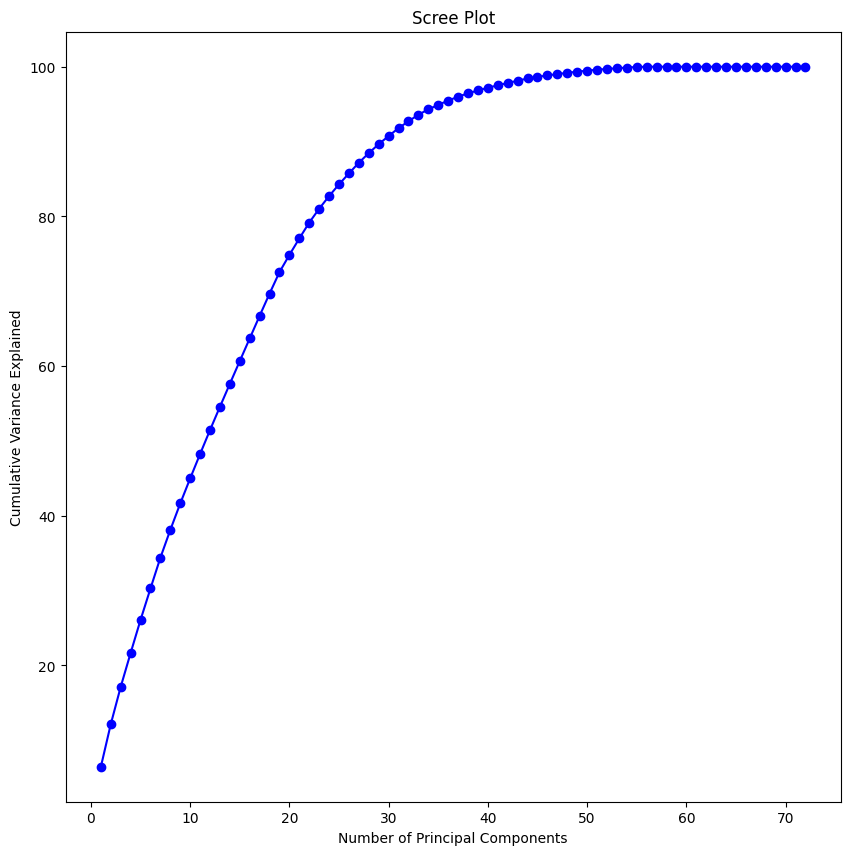

In [72]:
var1 = pd.DataFrame(var1, index=np.arange(1,73))
plt.figure(figsize = (10,10))
plt.plot(var1,'-o',color='blue')
plt.title('Scree Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.savefig('scree_plot.png',dpi=100,bbox_inches='tight')

From the above plot, we can see that if we choose a 30-component solution, the explained variance would be > 90%. That is to say, 30 orthogonal (uncorrelated) components will be able to keep more than 90% variance of the 76 variables in the original dataset. This would be a good solution. Now, let's do the PCA with 39 components.

In [74]:
# Select the number of components

pca30 = PCA(n_components=30)
X_train_pca30 = pca30.fit_transform(X_train)
X_test_pca30 = pca30.transform(X_test)


# Convert the numpy array to pandas DataFrame
X_train_pcadata = pd.DataFrame(X_train_pca30)
X_test_pcadata = pd.DataFrame(X_test_pca30)
X_train_pcadata.columns = ["PC"+str(i) for i in range(1,31)]
X_test_pcadata.columns = ["PC"+str(i) for i in range(1,31)]

# Show the head of the DataFrame
X_train_pcadata.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30
0,0.917077,1.576117,0.837074,-1.221726,0.334008,-0.114027,0.751393,0.315132,-0.314373,0.389890,...,-0.130042,-0.236403,0.127136,-0.195494,0.119504,-0.089510,-0.142636,-0.241762,0.695749,0.379119
1,-0.553770,0.392451,-0.669164,0.945010,0.646485,-0.613979,0.234438,-0.317295,-0.827185,-0.663356,...,-0.523133,0.492836,0.031451,0.058324,0.116831,-0.003254,-0.065891,-0.185328,0.096706,-0.026785
2,-0.257139,-0.141095,0.832466,0.529828,1.280654,0.836214,-0.441442,-0.155987,-0.269871,0.396632,...,0.005817,-0.496015,-0.257588,-0.529126,0.700482,-0.423345,-0.142493,0.396697,-0.106020,0.496427
3,-1.053565,-0.507281,0.018511,-0.143982,0.155792,0.617182,-0.407057,0.060534,-0.227469,0.053718,...,1.125683,-0.008416,-0.013511,-0.526360,0.179833,-0.361803,-0.354606,0.265504,-0.007808,-0.077552
4,0.880654,-1.316734,-0.354395,1.044119,0.443993,0.616695,0.322188,0.027451,-0.286789,-0.819870,...,-0.442905,0.117504,-0.173409,0.105400,0.093089,-0.093311,-0.002314,-0.111754,-0.144179,-0.126033


From the above correlation table, we can find that the pairwise correlations between two components are close to zeros. This means that all these components are orthogonal (not correlated). There is no multicollinearity among principal components.

PCA applies a linear transformation to transform the data to a new space with fewer dimensions. Let's show the loadings for the 1st principal component and explore how the 1st principal component is calculated from the normalized data.

These are the coefficients for the 30 variables to get the PC1

We can also manually calculate the 1st principal component score using the following dot product. 

# Predictive Modelling

We are predicting the borough in which the crime occurs based on the other data

## 1.RF

In [75]:
from sklearn.ensemble import RandomForestClassifier

Rf_classifier = RandomForestClassifier(n_estimators=15, max_features=38, random_state=123)
Rf_classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred_rf = Rf_classifier.predict(X_test)


In [76]:
# Show feature importance
Rf_classifier.feature_importances_

array([2.51341887e-06, 0.00000000e+00, 5.37426652e-05, 3.45935230e-05,
       3.69659565e-05, 6.43000863e-05, 2.20158436e-05, 0.00000000e+00,
       2.82366599e-06, 1.14577551e-01, 1.00517952e-01, 2.83846336e-01,
       1.31054084e-01, 1.07534738e-01, 1.01452060e-01, 8.14605193e-02,
       7.52980386e-02, 6.95336114e-06, 9.39360317e-05, 5.50018824e-05,
       2.34293083e-05, 1.20472357e-07, 0.00000000e+00, 9.05503891e-04,
       2.32877992e-05, 0.00000000e+00, 1.33110767e-03, 1.68820082e-05,
       3.47944321e-05, 3.19394713e-05, 6.80900632e-06, 7.22739680e-06,
       3.26469968e-05, 2.71763259e-05, 2.75106343e-05, 8.48349161e-05,
       0.00000000e+00, 2.11165725e-05, 3.53629481e-04, 5.41180750e-06,
       5.35642804e-05, 2.02152235e-05, 0.00000000e+00, 0.00000000e+00,
       3.35006835e-04, 4.55839233e-05, 6.12770897e-08, 1.77628055e-05,
       3.63467252e-05, 3.37436083e-05, 7.06783978e-06, 2.77397965e-05,
       1.62398879e-05, 3.78781432e-06, 9.11359526e-06, 1.20400798e-05,
      

In [77]:
# Beautify the display of feature importance
feature_importances = pd.DataFrame(Rf_classifier.feature_importances_,
                                   index = X_train_scale.columns,
                                   columns=['importance'])
feature_importances = feature_importances.sort_values('importance',ascending=False)

feature_importances

,importance
PATROL_BORO_PATROL BORO BRONX,0.283846
PATROL_BORO_PATROL BORO MAN NORTH,0.131054
PATROL_BORO_PATROL BORO BKLYN NORTH,0.114578
PATROL_BORO_PATROL BORO MAN SOUTH,0.107535
PATROL_BORO_PATROL BORO QUEENS NORTH,0.101452
...,...
CRM_ATPT_CPTD_CD_COMPLETED,0.000000
SUSP_RACE_BLACK HISPANIC,0.000000
SUSP_RACE_AMERICAN INDIAN/ALASKAN NATIVE,0.000000
LOC_OF_OCCUR_DESC_OPPOSITE OF,0.000000


<AxesSubplot:title={'center':'Feature Importance'}>

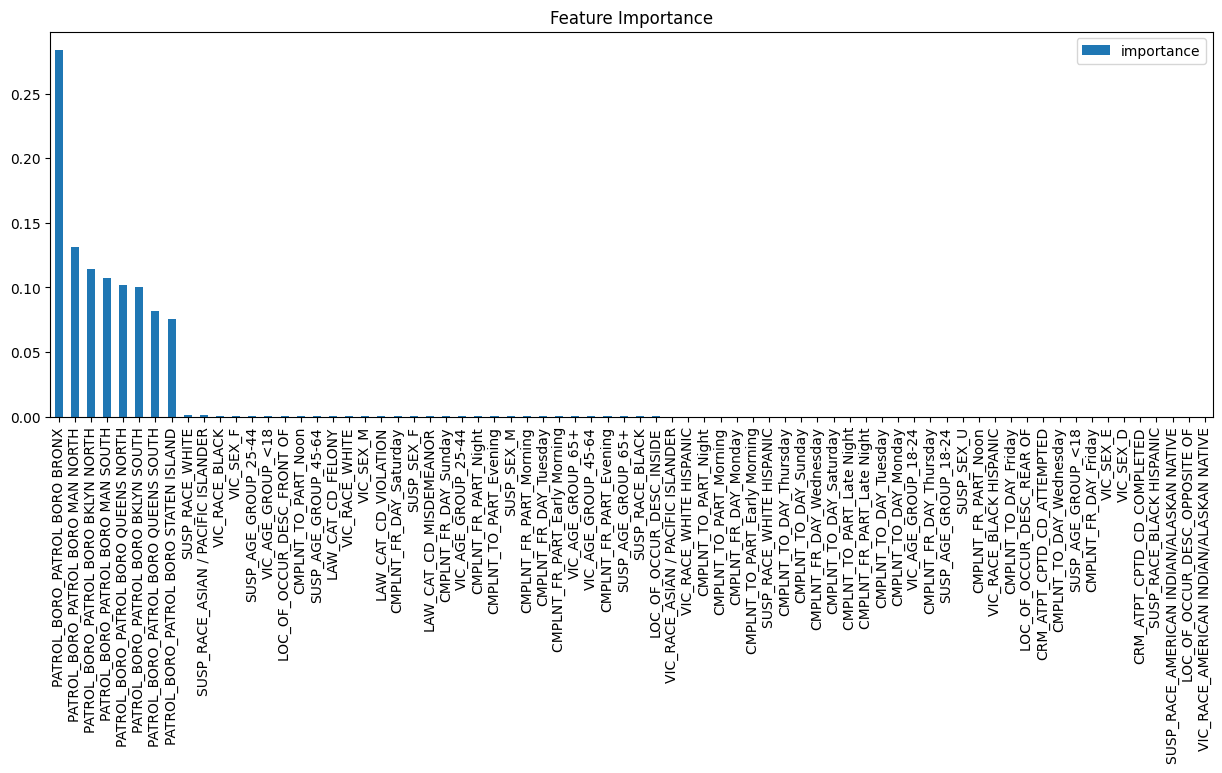

In [78]:
feature_importances.plot(kind = 'bar',figsize=(15,5),
                         title='Feature Importance')

In [79]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

Rf_cm = confusion_matrix(y_test, y_pred_rf)
print(Rf_cm)



[[2542    0    2    0    0]
 [   0 3493    0    0    0]
 [   0    0 2327    6    0]
 [   0    0    2 2642    1]
 [   0    0    0    0  557]]


In [80]:
print( accuracy_score(y_test, y_pred_rf))

0.9990494296577946


In [81]:
from sklearn.metrics import roc_auc_score

In [82]:
def roc_auc_score_multiclass(actual_class, pred_class, average = "macro"):

  #creating a set of all the unique classes using the actual class list
  unique_class = set(actual_class)
  roc_auc_dict = {}
  for per_class in unique_class:
    #creating a list of all the classes except the current class 
    other_class = [x for x in unique_class if x != per_class]

    #marking the current class as 1 and all other classes as 0
    new_actual_class = [0 if x in other_class else 1 for x in actual_class]
    new_pred_class = [0 if x in other_class else 1 for x in pred_class]

    #using the sklearn metrics method to calculate the roc_auc_score
    roc_auc = roc_auc_score(new_actual_class, new_pred_class, average = average)
    roc_auc_dict[per_class] = roc_auc

  return roc_auc_dict

In [83]:
roc_auc_score_multiclass(y_test, y_pred_rf)

{1: 0.9996069182389937,
 2: 1.0,
 3: 0.9984976283702397,
 4: 0.9990968331031177,
 5: 0.9999546073536086}

## 2.KNN

In [84]:
from sklearn import neighbors

# KNN: K=5, default measure of distance (euclidean)
knn5 = neighbors.KNeighborsClassifier(n_neighbors=5)
knn5.fit(X_train, y_train)

KNeighborsClassifier()

In [85]:
pred_y_knn5 = knn5.predict(X_test)


In [86]:
from sklearn import metrics
 
# Print confusion matrix
cm_knn = metrics.confusion_matrix(y_test, pred_y_knn5)
print(cm_knn)

[[2463   45   16   19    1]
 [ 116 3263   42   68    4]
 [ 224  292 1733   80    4]
 [ 149  284   99 2107    6]
 [  77  147   51   75  207]]


In [87]:
# Calculate classification accuracy
metrics.accuracy_score(y_test, pred_y_knn5)

0.8445385413066021

In [88]:
# Calculate Cohen's Kappa
metrics.cohen_kappa_score(y_test, pred_y_knn5)

0.7944101784778559

In [89]:
y_test.values

[3, 3, 1, 5, 3, ..., 4, 2, 3, 3, 2]
Length: 11572
Categories (5, int64): [1, 2, 3, 4, 5]

In [90]:
# Calculate AUC
roc_auc_score_multiclass(y_test, pred_y_knn5)

{1: 0.9527332679880622,
 2: 0.9195463761856109,
 3: 0.8601535719519933,
 4: 0.8847442911767215,
 5: 0.6851359864262133}

In [91]:
# Print classification report
print(metrics.classification_report(y_test, pred_y_knn5))

              precision    recall  f1-score   support

           1       0.81      0.97      0.88      2544
           2       0.81      0.93      0.87      3493
           3       0.89      0.74      0.81      2333
           4       0.90      0.80      0.84      2645
           5       0.93      0.37      0.53       557

    accuracy                           0.84     11572
   macro avg       0.87      0.76      0.79     11572
weighted avg       0.85      0.84      0.84     11572



In [92]:
for k in range(20):
    k = k + 1
    knn = neighbors.KNeighborsClassifier(n_neighbors = k, 
                                         weights='uniform', 
                                         algorithm='auto')
    knn.fit(X_train, y_train)
    pred_y = knn.predict(X_test)
    print("Accuracy is ", metrics.accuracy_score(y_test, pred_y)*100,"% for k =",k)

Accuracy is  78.16280677497409 % for k = 1
Accuracy is  73.09885931558935 % for k = 2
Accuracy is  81.34289664707916 % for k = 3
Accuracy is  82.95886622882821 % for k = 4
Accuracy is  84.4538541306602 % for k = 5
Accuracy is  85.49083995852057 % for k = 6
Accuracy is  87.00311095748357 % for k = 7
Accuracy is  87.78085032837885 % for k = 8
Accuracy is  88.212927756654 % for k = 9
Accuracy is  88.86968544763222 % for k = 10
Accuracy is  89.29312132734186 % for k = 11
Accuracy is  89.61285862426547 % for k = 12
Accuracy is  89.84618043553405 % for k = 13
Accuracy is  90.11406844106465 % for k = 14
Accuracy is  90.21776702385067 % for k = 15
Accuracy is  90.39923954372624 % for k = 16
Accuracy is  90.49429657794677 % for k = 17
Accuracy is  90.53750432077429 % for k = 18
Accuracy is  90.68441064638783 % for k = 19
Accuracy is  90.91773245765641 % for k = 20


## Multiclass Logistic Regression

In [93]:
# define the multinomial logistic regression model
# test classification dataset
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')

In [94]:
model.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial')

In [95]:
pred_y_log=model.predict(X_test)

In [96]:
cm_log = metrics.confusion_matrix(y_test, pred_y_log)
# Print confusion matrix
print(cm_log)

[[2544    0    0    0    0]
 [   0 3493    0    0    0]
 [   0    0 2327    6    0]
 [   0    0    0 2644    1]
 [   0    0    0    0  557]]


In [97]:
# Calculate classification accuracy
metrics.accuracy_score(y_test, pred_y_log)


0.9993950916004148

In [98]:
# Print classification report
print(metrics.classification_report(y_test, pred_y_log))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2544
           2       1.00      1.00      1.00      3493
           3       1.00      1.00      1.00      2333
           4       1.00      1.00      1.00      2645
           5       1.00      1.00      1.00       557

    accuracy                           1.00     11572
   macro avg       1.00      1.00      1.00     11572
weighted avg       1.00      1.00      1.00     11572



## 3.SVM

In [99]:
# Train an SVC with linear kernel
from sklearn import *
from sklearn import svm

svc_rbf = svm.SVC(kernel='poly', C=1.0)


In [100]:
svc_rbf.fit(X_train,y_train)


SVC(kernel='poly')

In [101]:
# Predict on test set
pred_y_svm = svc_rbf.predict(X_test)


In [102]:

cm_svm = metrics.confusion_matrix(y_test, pred_y_svm)
# Print confusion matrix
print(cm_svm)


[[2544    0    0    0    0]
 [   0 3493    0    0    0]
 [   0    0 2327    6    0]
 [   0    0    0 2644    1]
 [   0    0    0    0  557]]


In [103]:
# Calculate classification accuracy
metrics.accuracy_score(y_test, pred_y_svm)


0.9993950916004148

In [104]:
# Print classification report
print(metrics.classification_report(y_test, pred_y_svm))


              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2544
           2       1.00      1.00      1.00      3493
           3       1.00      1.00      1.00      2333
           4       1.00      1.00      1.00      2645
           5       1.00      1.00      1.00       557

    accuracy                           1.00     11572
   macro avg       1.00      1.00      1.00     11572
weighted avg       1.00      1.00      1.00     11572



## 4.Naive

In [105]:
from sklearn import naive_bayes
gauss_nb = naive_bayes.GaussianNB()

In [106]:
gauss_nb.fit(X_train,y_train)

GaussianNB()

In [107]:
pred_y_gnb = gauss_nb.predict(X_test)

In [108]:
# Print confusion matrix
nb_cm = confusion_matrix(y_test, pred_y_gnb)

In [109]:
nb_cm

array([[2544,    0,    0,    0,    0],
       [   0, 3493,    0,    0,    0],
       [   0,    0, 2327,    6,    0],
       [   0,    0,    0, 2644,    1],
       [   0,    0,    0,    0,  557]], dtype=int64)

In [110]:
# Calculate classification accuracy
metrics.accuracy_score(y_test, pred_y_gnb)

0.9993950916004148

In [111]:
from sklearn.metrics import roc_auc_score


In [112]:
y_test

50354    3
49596    3
34078    1
1068     5
37444    3
        ..
8015     4
760      2
22420    3
54443    3
18075    2
Name: BORO_NM, Length: 11572, dtype: category
Categories (5, int64): [1, 2, 3, 4, 5]

In [113]:
roc_auc_score_multiclass(y_test, pred_y_gnb)

{1: 1.0,
 2: 1.0,
 3: 0.9987141020145736,
 4: 0.999474904936766,
 5: 0.9999546073536086}

In [114]:
# Calculate Cohen's Kappa
metrics.cohen_kappa_score(y_test, pred_y_gnb)

0.9992096341965692

In [115]:
# Print classification report
print(metrics.classification_report(y_test, pred_y_gnb))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2544
           2       1.00      1.00      1.00      3493
           3       1.00      1.00      1.00      2333
           4       1.00      1.00      1.00      2645
           5       1.00      1.00      1.00       557

    accuracy                           1.00     11572
   macro avg       1.00      1.00      1.00     11572
weighted avg       1.00      1.00      1.00     11572



### 4.2. Bernoulli Naive Bayes Classifier

In [116]:
# Naive Bayes classifier for multivariate Bernoulli models
bernou_nb = naive_bayes.BernoulliNB()

In [117]:
bernou_nb.fit(X_train, y_train)

BernoulliNB()

In [118]:
pred_y_bnb = bernou_nb.predict(X_test)

In [119]:
# Print confusion matrix
nb_cm = confusion_matrix(y_test, pred_y_bnb)

In [120]:
nb_cm

array([[2544,    0,    0,    0,    0],
       [   0, 3493,    0,    0,    0],
       [   0,    0, 2327,    6,    0],
       [   0,    0,    0, 2644,    1],
       [   0,    0,    0,    0,  557]], dtype=int64)

In [121]:
# Calculate classification accuracy
metrics.accuracy_score(y_test, pred_y_bnb)

0.9993950916004148

In [122]:
# Calculate AUC
roc_auc_score_multiclass(y_test, pred_y_bnb)

{1: 1.0,
 2: 1.0,
 3: 0.9987141020145736,
 4: 0.999474904936766,
 5: 0.9999546073536086}

In [123]:
# Calculate Cohen's Kappa
metrics.cohen_kappa_score(y_test, pred_y_bnb)

0.9992096341965692

In [124]:
# Print classification report
print(metrics.classification_report(y_test, pred_y_bnb))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2544
           2       1.00      1.00      1.00      3493
           3       1.00      1.00      1.00      2333
           4       1.00      1.00      1.00      2645
           5       1.00      1.00      1.00       557

    accuracy                           1.00     11572
   macro avg       1.00      1.00      1.00     11572
weighted avg       1.00      1.00      1.00     11572



3.3. Compare the Two Naive Bayes Models

In [125]:
acc = [metrics.accuracy_score(y_test, pred_y_gnb),
       metrics.accuracy_score(y_test, pred_y_bnb)]

pre = [metrics.precision_score(y_test, pred_y_gnb,average='micro'),
       metrics.precision_score(y_test, pred_y_bnb,average='micro')]

rec = [metrics.recall_score(y_test, pred_y_gnb,average='micro'),
       metrics.recall_score(y_test, pred_y_bnb,average='micro')]

f1  = [metrics.f1_score(y_test, pred_y_gnb,average='micro'),
       metrics.f1_score(y_test, pred_y_bnb,average='micro')]

In [126]:
pd.DataFrame({'Accuracy':acc, 'Precision':pre, 'Recall':rec, 'F1 Score': f1},
             index = ['Gaussian Naive Bayes','Bernoulli Naive Bayes'])

,Accuracy,Precision,Recall,F1 Score
Gaussian Naive Bayes,0.999395,0.999395,0.999395,0.999395
Bernoulli Naive Bayes,0.999395,0.999395,0.999395,0.999395


## 5.Decision Tree

In [127]:
from sklearn import tree
# Decision trees for classification, use entropy criterion (gini by default)
dt = tree.DecisionTreeClassifier(criterion='entropy')
dt.fit( X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [128]:
# Import modules
#import pydotplus
#from IPython.display import Image

# Export the decision tree as a graphviz dot object
#dot_data = tree.export_graphviz(dt, out_file=None,
                               # feature_names=X.columns,
                               # class_names= ['Good', 'Bad'],
                                #filled=True, rounded=True,
                               # special_characters=False)

# Convert the dot data into a graph
#graph = pydotplus.graph_from_dot_data(dot_data)

In [129]:
pred_y_dt = dt.predict(X_test)

In [130]:
cm_tree = metrics.confusion_matrix(y_test, pred_y_dt)
# Print confusion matrix
print(cm_tree)

[[2542    1    1    0    0]
 [   0 3493    0    0    0]
 [   0    0 2327    6    0]
 [   0    0    6 2638    1]
 [   0    0    0    0  557]]


In [131]:
# Calculate classification accuracy
metrics.accuracy_score(y_test, pred_y_dt)

0.9987037677151746

In [132]:
# Calculate AUC
roc_auc_score_multiclass(y_test, pred_y_dt)

{1: 0.9996069182389937,
 2: 0.9999381111523704,
 3: 0.9983352731369893,
 4: 0.9983406894358208,
 5: 0.9999546073536086}

In [133]:
# Calculate Cohen's Kappa
metrics.cohen_kappa_score(y_test, pred_y_dt)

0.9983063777318587

In [134]:
# Print classification report
print(metrics.classification_report(y_test, pred_y_dt))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2544
           2       1.00      1.00      1.00      3493
           3       1.00      1.00      1.00      2333
           4       1.00      1.00      1.00      2645
           5       1.00      1.00      1.00       557

    accuracy                           1.00     11572
   macro avg       1.00      1.00      1.00     11572
weighted avg       1.00      1.00      1.00     11572



## 6.ANN

In [135]:
# Specify an ANN model, use 1 hidden layer with 20 nodes
ann1 = neural_network.MLPRegressor(alpha=1e-5,
                                   activation='relu',
                                   hidden_layer_sizes=(20),
                                   random_state=1)

In [136]:
ann1.fit(X_train, y_train)

MLPRegressor(alpha=1e-05, hidden_layer_sizes=20, random_state=1)

In [137]:
from sklearn import metrics

In [138]:
# Predict on test set
pred_y1 = ann1.predict(X_test)
pd.Series(pred_y1).describe()

count    11572.000000
mean         2.587165
std          1.196855
min          0.874384
25%          1.999238
50%          2.008823
75%          3.999837
max          5.019779
dtype: float64

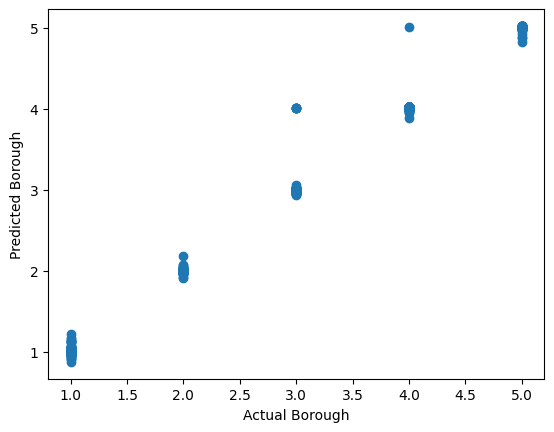

In [139]:
plt.scatter(y_test, pred_y1)
plt.xlabel('Actual Borough')
plt.ylabel('Predicted Borough')
plt.show()

In [140]:
# Calculate MAE
metrics.mean_absolute_error(y_test, pred_y1)

0.005197502385746735

In [141]:
# Calculate R squared
metrics.r2_score(y_test, pred_y1)

0.9995206349864794

In [142]:
# Calculate MSE
metrics.mean_squared_error(y_test, pred_y1)

0.000684859600007897

In [143]:
# Calculate RMSE 
metrics.mean_squared_error(y_test, pred_y1,squared=False)

0.026169822315176252

In [144]:
# Select the 39 most importance features
X_train_imp = X_train[feature_importances.index[range(39)]]
X_train_imp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46286 entries, 6587 to 15449
Data columns (total 39 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   PATROL_BORO_PATROL BORO BRONX          46286 non-null  uint8
 1   PATROL_BORO_PATROL BORO MAN NORTH      46286 non-null  uint8
 2   PATROL_BORO_PATROL BORO BKLYN NORTH    46286 non-null  uint8
 3   PATROL_BORO_PATROL BORO MAN SOUTH      46286 non-null  uint8
 4   PATROL_BORO_PATROL BORO QUEENS NORTH   46286 non-null  uint8
 5   PATROL_BORO_PATROL BORO BKLYN SOUTH    46286 non-null  uint8
 6   PATROL_BORO_PATROL BORO QUEENS SOUTH   46286 non-null  uint8
 7   PATROL_BORO_PATROL BORO STATEN ISLAND  46286 non-null  uint8
 8   SUSP_RACE_WHITE                        46286 non-null  uint8
 9   SUSP_RACE_ASIAN / PACIFIC ISLANDER     46286 non-null  uint8
 10  VIC_RACE_BLACK                         46286 non-null  uint8
 11  VIC_SEX_F                

In [145]:
X_test_imp = X_test[feature_importances.index[range(39)]]
X_test_imp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11572 entries, 50354 to 18075
Data columns (total 39 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   PATROL_BORO_PATROL BORO BRONX          11572 non-null  uint8
 1   PATROL_BORO_PATROL BORO MAN NORTH      11572 non-null  uint8
 2   PATROL_BORO_PATROL BORO BKLYN NORTH    11572 non-null  uint8
 3   PATROL_BORO_PATROL BORO MAN SOUTH      11572 non-null  uint8
 4   PATROL_BORO_PATROL BORO QUEENS NORTH   11572 non-null  uint8
 5   PATROL_BORO_PATROL BORO BKLYN SOUTH    11572 non-null  uint8
 6   PATROL_BORO_PATROL BORO QUEENS SOUTH   11572 non-null  uint8
 7   PATROL_BORO_PATROL BORO STATEN ISLAND  11572 non-null  uint8
 8   SUSP_RACE_WHITE                        11572 non-null  uint8
 9   SUSP_RACE_ASIAN / PACIFIC ISLANDER     11572 non-null  uint8
 10  VIC_RACE_BLACK                         11572 non-null  uint8
 11  VIC_SEX_F               

In [146]:
# Specify an ANN model, use 3 hidden layers
ann2 = neural_network.MLPRegressor(solver='lbfgs',
                                   activation='relu',
                                   alpha=1e-5,
                                   hidden_layer_sizes=(20, 15, 10),
                                   random_state=1)

In [147]:
ann2.fit(X_train, y_train)

MLPRegressor(alpha=1e-05, hidden_layer_sizes=(20, 15, 10), random_state=1,
             solver='lbfgs')

In [148]:
# Predict on test set
pred_y2 = ann2.predict(X_test)
pd.Series(pred_y2).describe()

count    11572.000000
mean         2.583610
std          1.195068
min          0.966514
25%          1.993341
50%          2.007714
75%          3.992018
max          5.034736
dtype: float64

Text(0, 0.5, 'Predicted Borough')

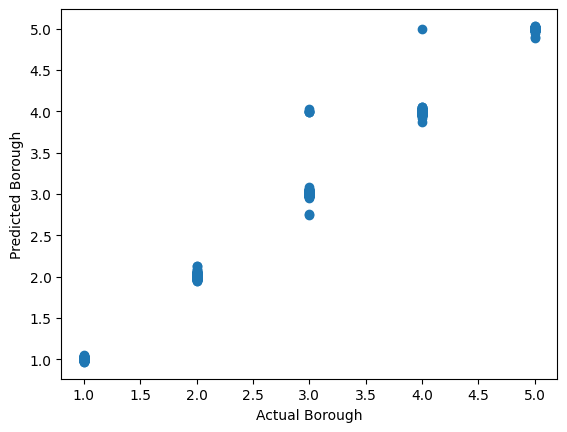

In [149]:
plt.scatter(y_test, pred_y2)
plt.xlabel('Actual Borough')
plt.ylabel('Predicted Borough')

In [150]:
# Calculate MAE
metrics.mean_absolute_error(y_test, pred_y2)

0.005166191731605588

In [151]:
# Calculate R squared
metrics.r2_score(y_test, pred_y2)

0.9995321985512764

In [152]:
# Calculate MSE
metrics.mean_squared_error(y_test, pred_y2)

0.0006683389567857046

In [153]:
# Calculate RMSE 
metrics.mean_squared_error(y_test, pred_y2, squared=False)

0.02585225245091237

### 2.3. Train another ANN Model Using Important Features

In [154]:
# Specify an ANN model, use 3 hidden layers
ann3 = neural_network.MLPRegressor(solver='lbfgs',
                                   activation='relu',
                                   alpha=1e-5,
                                   hidden_layer_sizes=(20, 15, 10),
                                   random_state=1)

In [155]:
ann3.fit(X_train_imp, y_train)

C:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPRegressor(alpha=1e-05, hidden_layer_sizes=(20, 15, 10), random_state=1,
             solver='lbfgs')

In [156]:
# Predict on test set
pred_y3 = ann3.predict(X_test_imp)
pd.Series(pred_y3).describe()

count    11572.000000
mean         2.583046
std          1.195239
min          0.943801
25%          1.995085
50%          2.006704
75%          3.991041
max          5.013922
dtype: float64

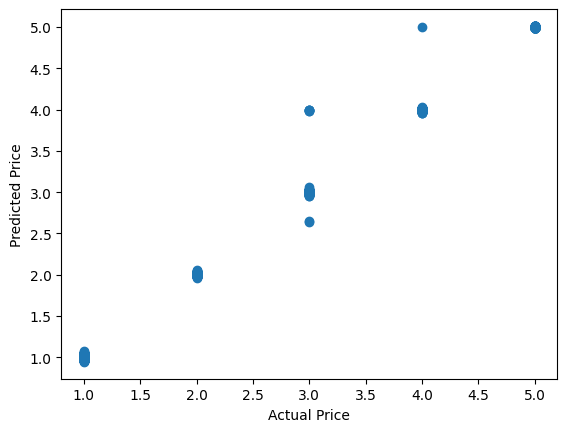

In [157]:
plt.scatter(y_test, pred_y3)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

In [158]:
# Calculate MAE
metrics.mean_absolute_error(y_test, pred_y3)

0.006219683668159506

In [159]:
# Calculate R squared
metrics.r2_score(y_test, pred_y3)

0.9995182683721586

In [160]:
metrics.r2_score(y_test, pred_y3)

0.9995182683721586

In [161]:
# Calculate MSE
metrics.mean_squared_error(y_test, pred_y3)

0.0006882407364932709

In [162]:
# Calculate RMSE 
metrics.mean_squared_error(y_test, pred_y3, squared=False)

0.026234342692228272

In [163]:
hid = ['20','20-15-10','20-15-10']

fsec = [False, False, True]

mae = [metrics.mean_absolute_error(y_test, pred_y1),
       metrics.mean_absolute_error(y_test, pred_y2),
       metrics.mean_absolute_error(y_test, pred_y3)]

r2 = [metrics.r2_score(y_test, pred_y1),
      metrics.r2_score(y_test, pred_y2),
      metrics.r2_score(y_test, pred_y3)]
mse = [metrics.mean_squared_error(y_test, pred_y1),
       metrics.mean_squared_error(y_test, pred_y2),
       metrics.mean_squared_error(y_test, pred_y3)]

rmse = [metrics.mean_squared_error(y_test, pred_y1, squared=False),
        metrics.mean_squared_error(y_test, pred_y2, squared=False),
        metrics.mean_squared_error(y_test, pred_y3, squared=False)]

In [164]:
pd.DataFrame({'Feature Selection': fsec,
              'Hidden Layers':hid,
              'MAE':mae, 'R2':r2, 
              'MSE':mse, 'RMSE':rmse},
            index = ['Model 1','Model 2','Model 3'])

,Feature Selection,Hidden Layers,MAE,R2,MSE,RMSE
Model 1,False,20,0.005198,0.999521,0.000685,0.026170
Model 2,False,20-15-10,0.005166,0.999532,0.000668,0.025852
Model 3,True,20-15-10,0.006220,0.999518,0.000688,0.026234


## Summarize Findings

In [165]:
acc = [metrics.accuracy_score(y_test, y_pred_rf),
       metrics.accuracy_score(y_test, pred_y_knn5),
      metrics.accuracy_score(y_test, pred_y_svm),
      metrics.accuracy_score(y_test, pred_y_gnb),
      metrics.accuracy_score(y_test, pred_y_bnb),
      '',
      metrics.accuracy_score(y_test, pred_y_dt),]

pre = [metrics.precision_score(y_test, y_pred_rf,average='micro'),
       metrics.precision_score(y_test, pred_y_knn5,average='micro'),
      metrics.precision_score(y_test, pred_y_svm,average='micro'),
      metrics.precision_score(y_test, pred_y_gnb,average='micro'),
      metrics.precision_score(y_test, pred_y_bnb,average='micro'),
      '',
      metrics.precision_score(y_test, pred_y_dt,average='micro')]

rec = [metrics.recall_score(y_test, y_pred_rf,average='micro'),
       metrics.recall_score(y_test, pred_y_knn5,average='micro'),
      metrics.recall_score(y_test, pred_y_svm,average='micro'),
      metrics.recall_score(y_test, pred_y_gnb,average='micro'),
      metrics.recall_score(y_test, pred_y_bnb,average='micro'),
      '',
      metrics.recall_score(y_test, pred_y_dt,average='micro')]

f1  = [metrics.f1_score(y_test, y_pred_rf,average='micro'),
       metrics.f1_score(y_test, pred_y_knn5,average='micro'),
      metrics.f1_score(y_test, pred_y_svm,average='micro'),
      metrics.f1_score(y_test, pred_y_gnb,average='micro'),
      metrics.f1_score(y_test, pred_y_bnb,average='micro'),
      '',
      metrics.f1_score(y_test, pred_y_dt,average='micro')]

rmse = [metrics.mean_squared_error(y_test, y_pred_rf, squared=False),
        metrics.mean_squared_error(y_test, pred_y_knn5, squared=False),
        metrics.mean_squared_error(y_test, pred_y_svm, squared=False),
       metrics.mean_squared_error(y_test, pred_y_gnb, squared=False),
       metrics.mean_squared_error(y_test, pred_y_bnb, squared=False),
       metrics.mean_squared_error(y_test, pred_y2, squared=False),
       metrics.mean_squared_error(y_test, pred_y_dt, squared=False)]

mae = [metrics.mean_absolute_error(y_test, y_pred_rf),
       metrics.mean_absolute_error(y_test, pred_y_knn5),
       metrics.mean_absolute_error(y_test, pred_y_svm),
      metrics.mean_absolute_error(y_test, pred_y_gnb),
      metrics.mean_absolute_error(y_test, pred_y_bnb),
      metrics.mean_absolute_error(y_test, pred_y2),
      metrics.mean_absolute_error(y_test, pred_y_dt)]

In [166]:
pd.DataFrame({'Accuracy':acc, 'Precision':pre, 'Recall':rec, 'F1 Score': f1, 'RMSE': rmse, 'Mean Abs Error': mae},
             index = ['Random Forest','KNN','SVM','Gaussian Naive Bayes','Bernoulli Naive Bayes','Neural Network','Decision Tree'])

,Accuracy,Precision,Recall,F1 Score,RMSE,Mean Abs Error
Random Forest,0.999049,0.999049,0.999049,0.999049,0.038328,0.001123
KNN,0.844539,0.844539,0.844539,0.844539,0.803015,0.286727
SVM,0.999395,0.999395,0.999395,0.999395,0.024595,0.000605
Gaussian Naive Bayes,0.999395,0.999395,0.999395,0.999395,0.024595,0.000605
Bernoulli Naive Bayes,0.999395,0.999395,0.999395,0.999395,0.024595,0.000605
Neural Network,,,,,0.025852,0.005166
Decision Tree,0.998704,0.998704,0.998704,0.998704,0.039440,0.001383


So from the above graph Gaussian Naive Bayes, Bernoulli Naive Bayes and SVM have the best predictive accuracy and lower RMSE 

## Key Findings

1. For the Felony crime Brooklyn has the highest rates followed by Manhattan ,Bronx and Queens,Staten Island
2. For Violation again Brooklyn stands first followed by Bronx,Queens,Manhattan,Staten Island 
3. For the Misdemeanour crime Brooklyn and Manhattan has the highest rates followed by Bronx and Queens,Staten Island
4. Brooklyn is the high crime happening place and Staten Island Boro is least crime happening place
5. Suspect type involved in crime, Male are involved highly in the Crimes around the age group of 25-44
6. Females are hihest victims
7. With respect to types of crime happened Harassment is the highest one in NY
8. Misdemeanour, an offence of which a sentence in excess of 15 days but not greater than one year may be imposed, is the most popular level of crime.
9. On average, there are 7443 victims of rape and sexual assault each year in New York City.



By employing all of these forecasts based on different projections in the future, the New York Police Department can anticipate the distinct crime and with a decent filtering choices according to their requirements, and it also allows them to know how important data gathering is for future predictions.